In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Dataset
Load the CSV file into a Pandas DataFrame and create a deep copy to preserve the original data.


In [2]:
path_name="loan_data.csv"
df_main=pd.read_csv(path_name,low_memory=False)
df = df_main.copy(deep=True)

# 2. Inspect the Dataset
Check the shape of the dataset, display the first few rows, and examine the summary information and descriptive statistics.


In [3]:
# Shape and first few rows
print("Shape of the dataset:", df.shape)
print("First five rows of the dataset:")
print(df.head())

# Summary of the dataset
print("Summary of the dataset:")
print(df.info())

# Descriptive statistics
print("Descriptive statistics:")
print(df.describe(include='all'))


Shape of the dataset: (2260701, 151)
First five rows of the dataset:
         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
3  66310712        NaN    35000.0      35000.0          35000.0   60 months   
4  68476807        NaN    10400.0      10400.0          10400.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.99       123.03     C        C4  ...                            NaN   
1     11.99       820.28     C        C1  ...                            NaN   
2     10.78       432.66     B        B4  ...                            NaN   
3     14.85       829.90     C        C5  ...                            NaN   
4     22.45       289.91     F        F1  ...           

# 3. Check Missing Values
Identify missing data in the dataset and visualize it using a heatmap.


Missing values per column:
id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64


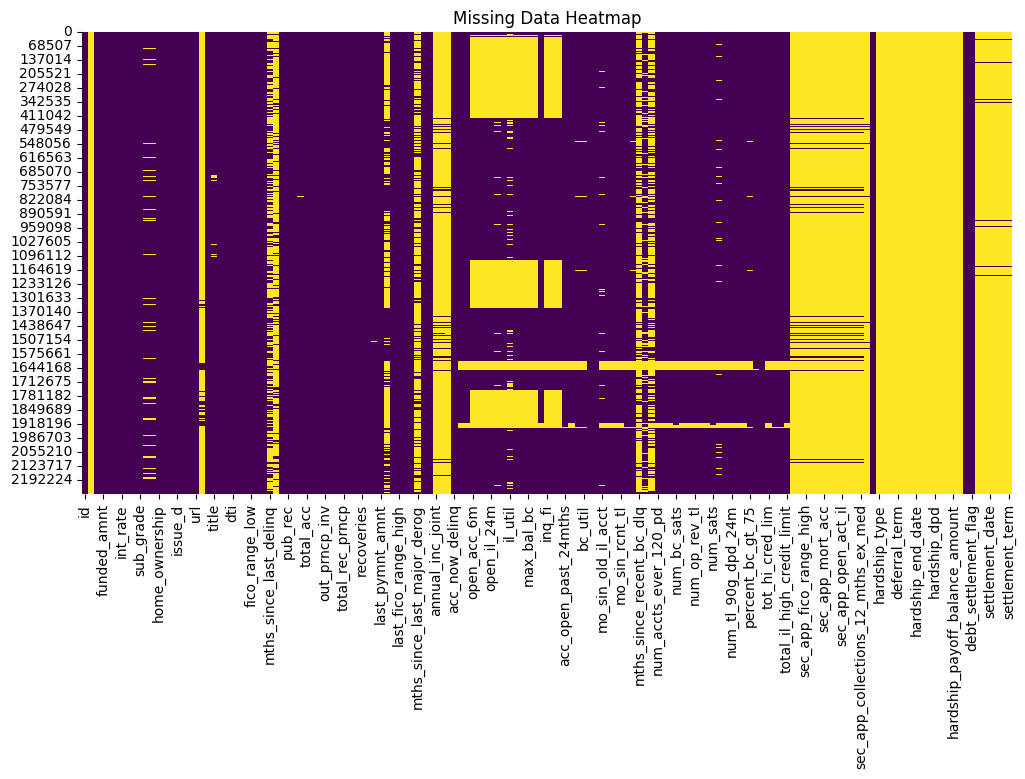

In [4]:
# Missing values count
print("Missing values per column:")
print(df.isnull().sum())

# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


# 4. Check for Duplicates
Identify duplicate rows in the dataset without removing them.


In [5]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


# 5. Check Data Types
Display the data types of each column and attempt to convert numerical-like data stored as objects to numeric types.


In [6]:
# Data types of each column
print("Data types of each column:")
print(df.dtypes)

# Convert object columns with numerical-like data to proper types
for col in df.select_dtypes(include=['object']).columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        pass


Data types of each column:
id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 151, dtype: object


# 6. Explore Categorical Columns
Examine unique values in categorical columns.


In [7]:
# Unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")


Unique values in id: ['68407277' '68355089' '68341763' ... '88215728'
 'Total amount funded in policy code 1: 1465324575'
 'Total amount funded in policy code 2: 521953170']
Unique values in term: [' 36 months' ' 60 months' nan]
Unique values in grade: ['C' 'B' 'F' 'A' 'E' 'D' 'G' nan]
Unique values in sub_grade: ['C4' 'C1' 'B4' 'C5' 'F1' 'C3' 'B2' 'B1' 'A2' 'B5' 'C2' 'E2' 'A4' 'E3'
 'A1' 'D4' 'F3' 'D1' 'B3' 'E4' 'D3' 'D2' 'D5' 'A5' 'F2' 'E1' 'F5' 'E5'
 'A3' 'G2' 'G1' 'G3' 'G4' 'F4' 'G5' nan]
Unique values in emp_title: ['leadman' 'Engineer' 'truck driver' ... 'Sr. Photo Producer'
 'Exec Dir Internal Audit' 'Current Operations Officer']
Unique values in emp_length: ['10+ years' '3 years' '4 years' '6 years' '1 year' '7 years' '8 years'
 '5 years' '2 years' '9 years' '< 1 year' nan]
Unique values in home_ownership: ['MORTGAGE' 'RENT' 'OWN' 'ANY' nan 'NONE' 'OTHER']
Unique values in verification_status: ['Not Verified' 'Source Verified' 'Verified' nan]
Unique values in issue_d: ['Dec-201

# 7. Analyze Correlations
Calculate and visualize the correlation matrix for numerical features.


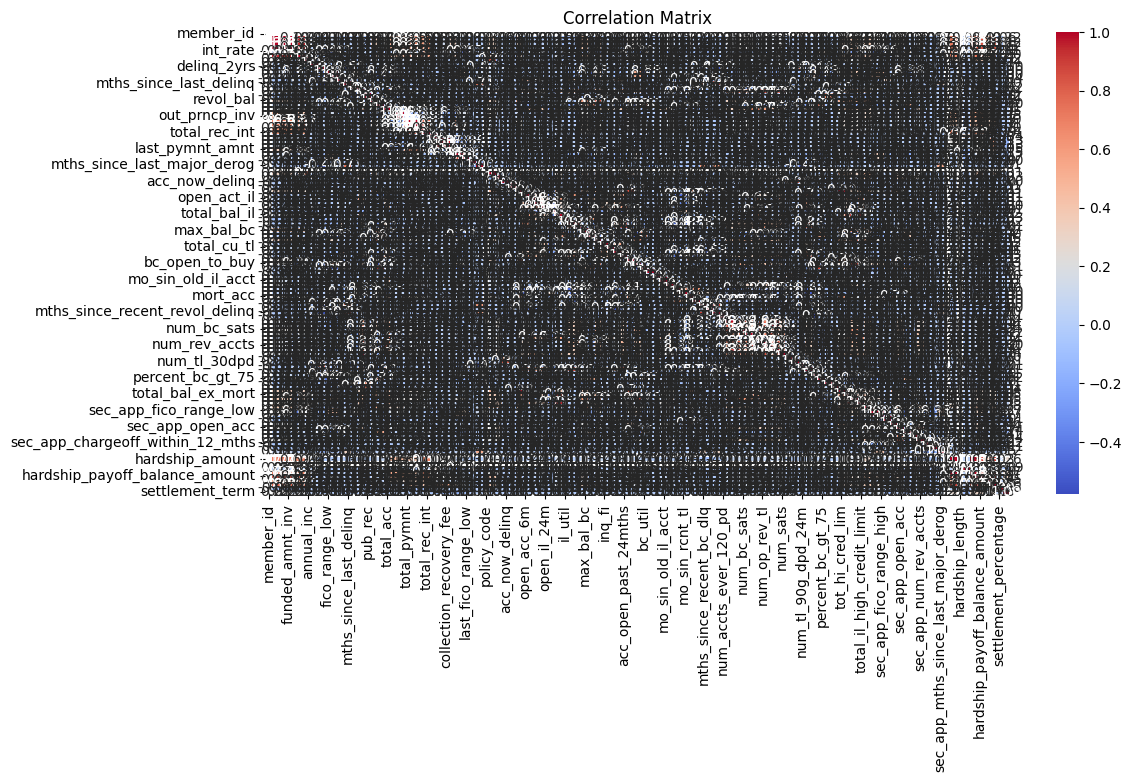

In [8]:
# Correlation matrix
# Filter numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


# 8. Visualize Numerical Features
Plot the distributions and boxplots for numerical features to identify patterns and outliers.


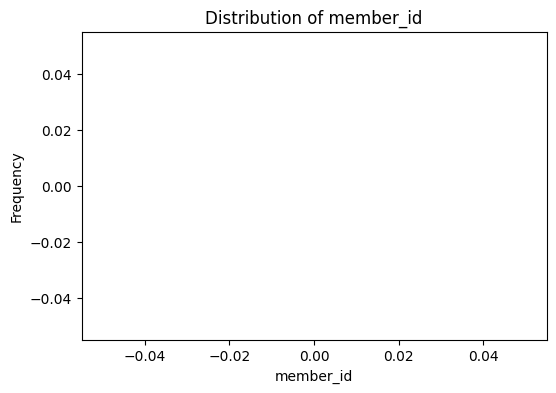

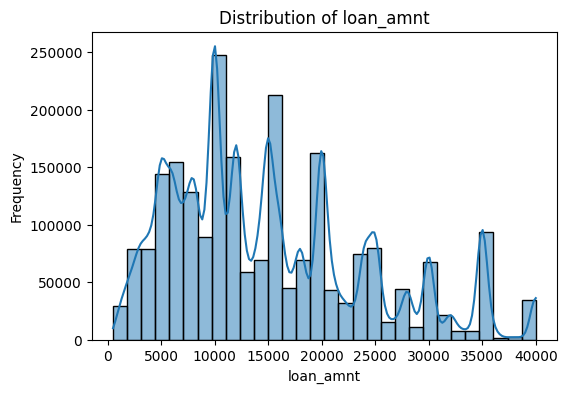

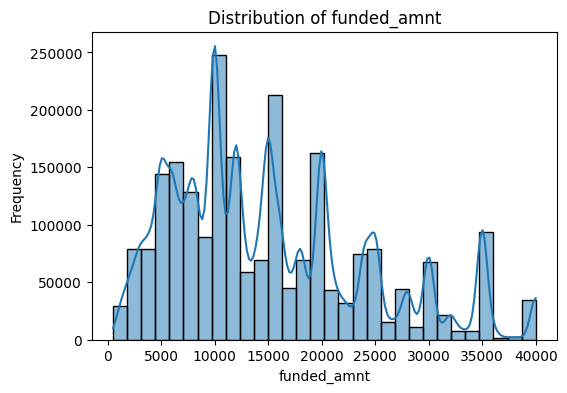

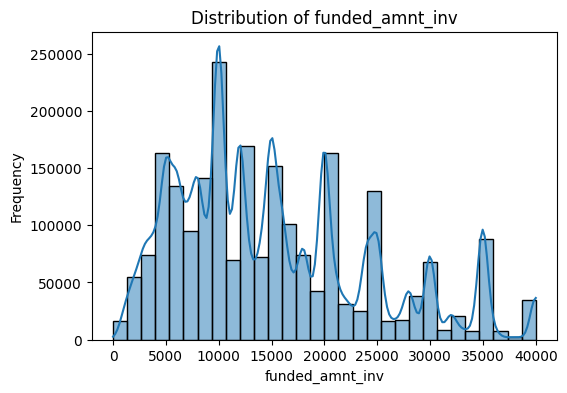

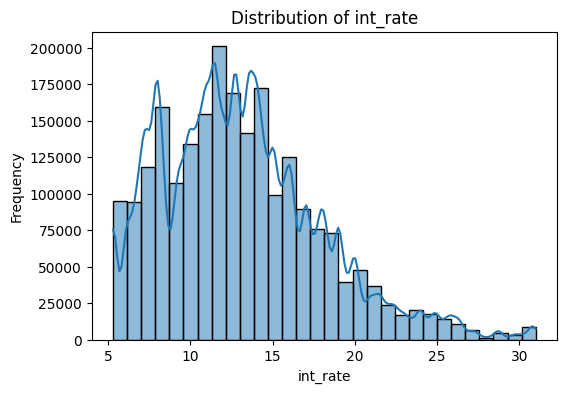

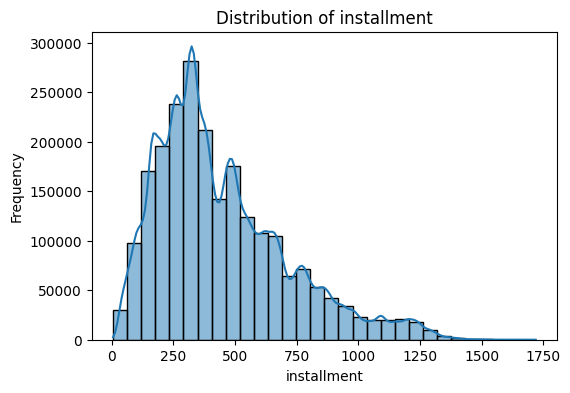

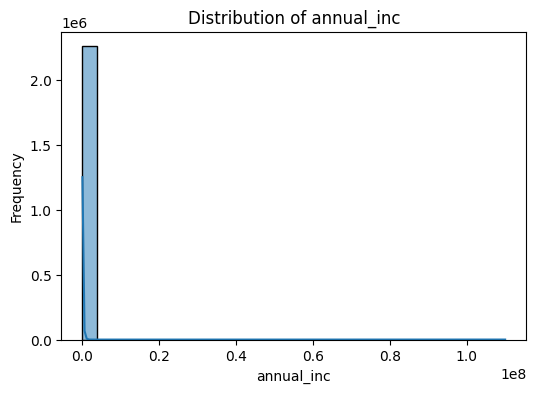

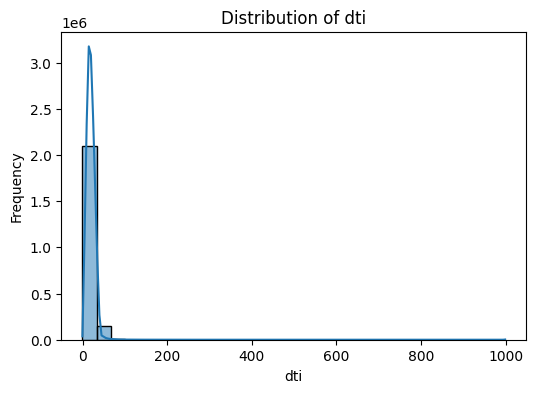

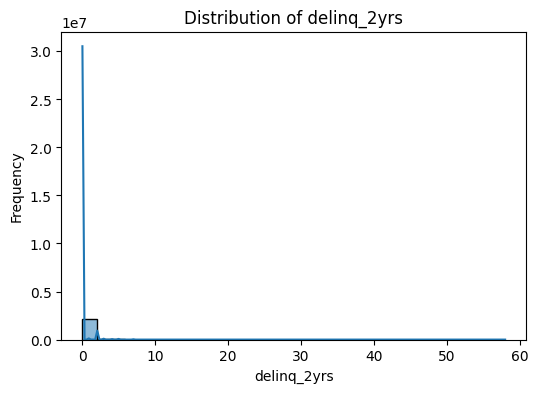

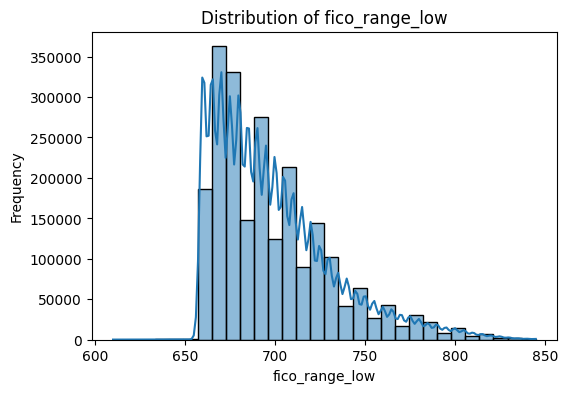

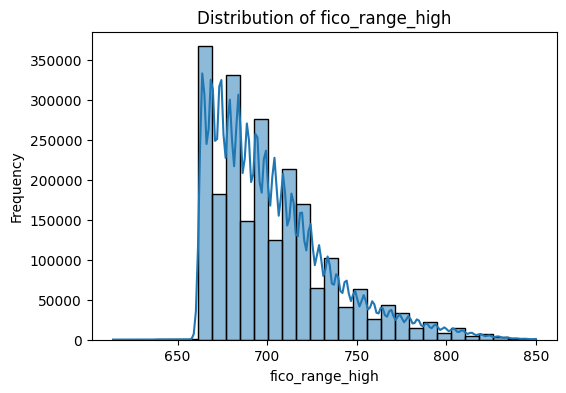

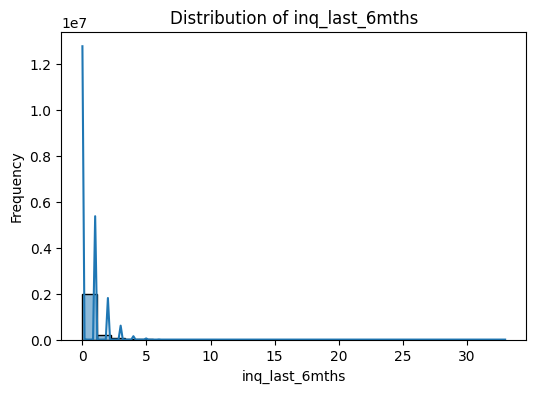

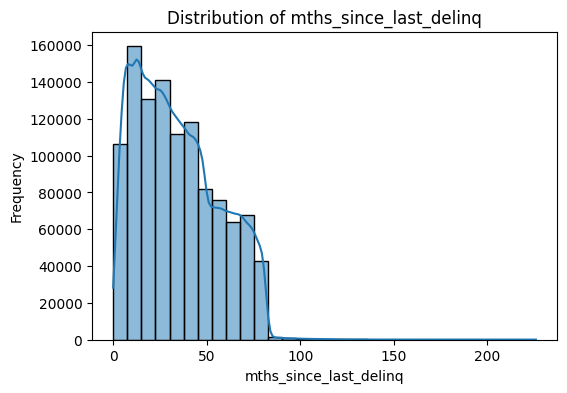

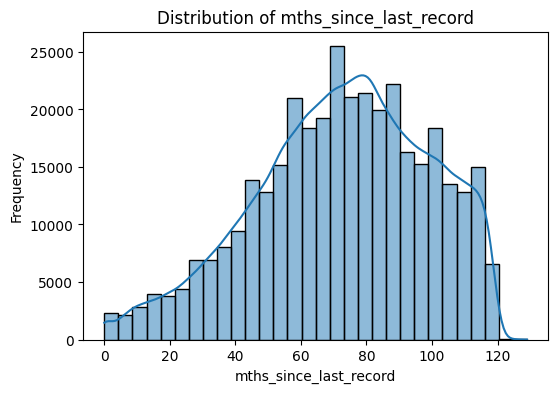

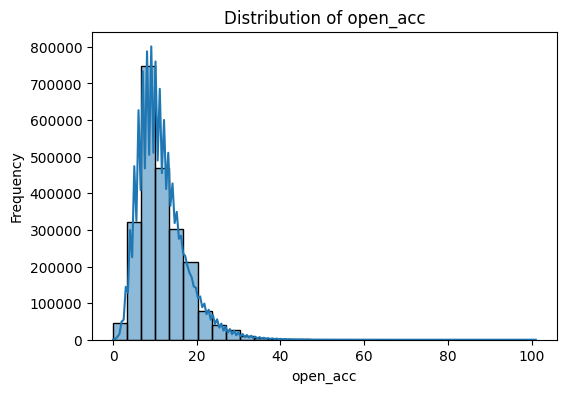

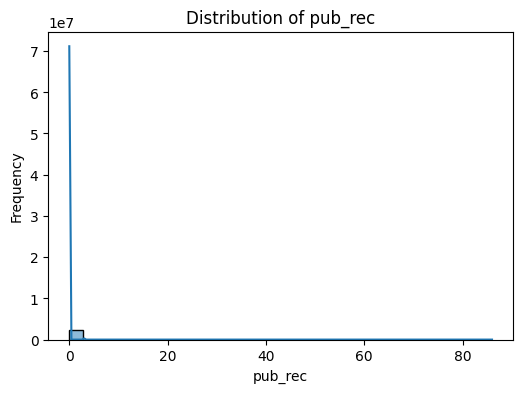

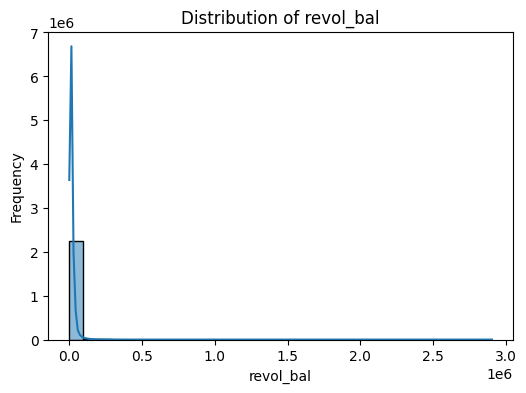

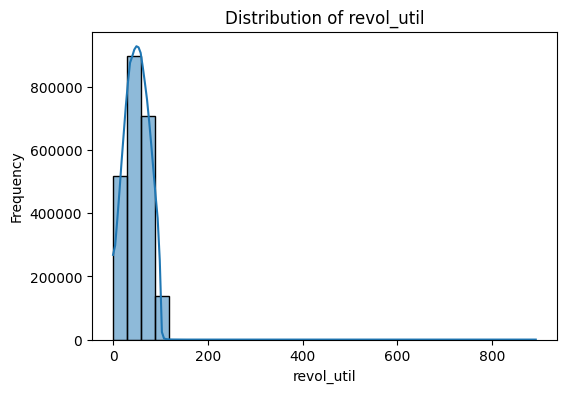

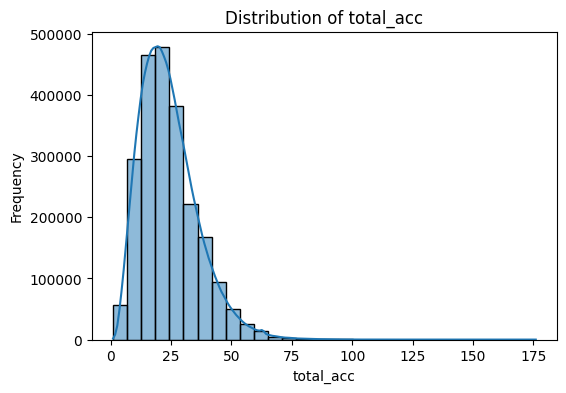

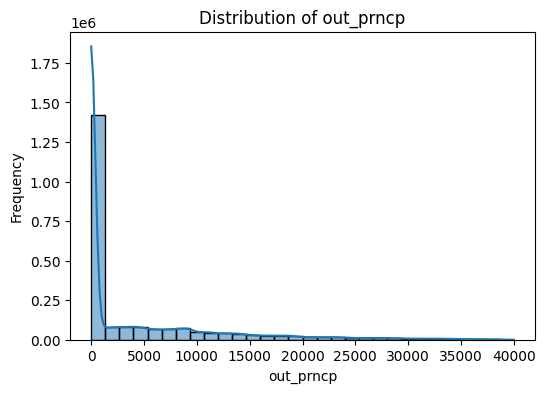

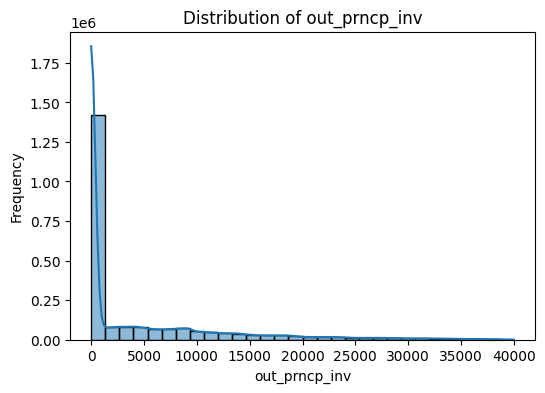

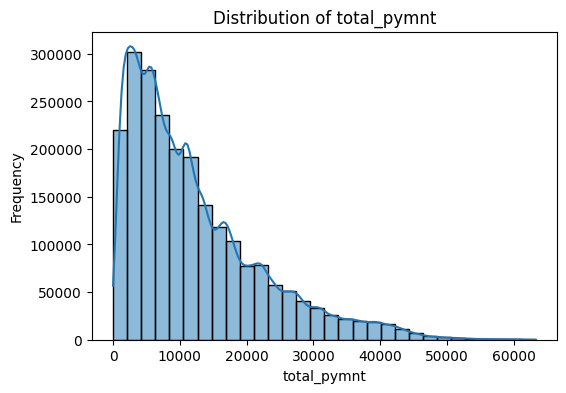

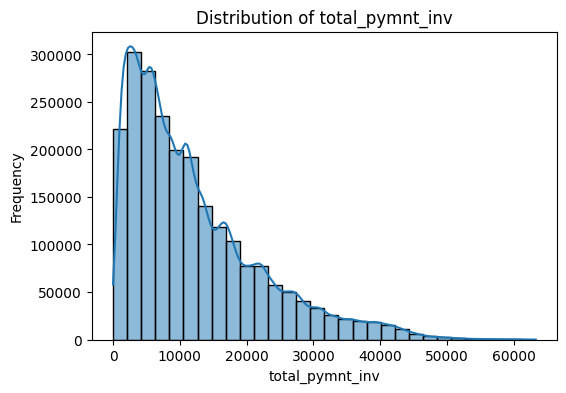

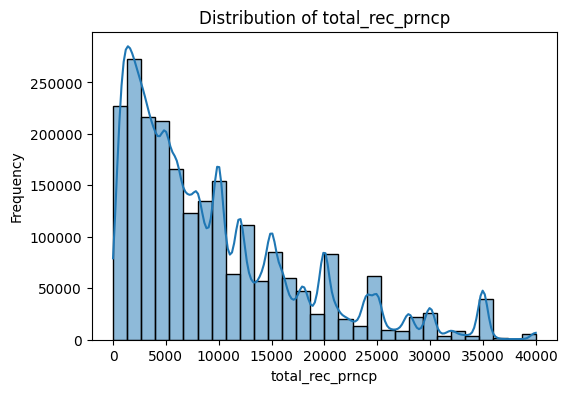

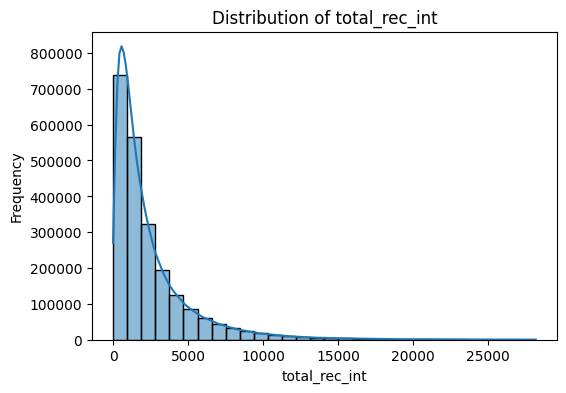

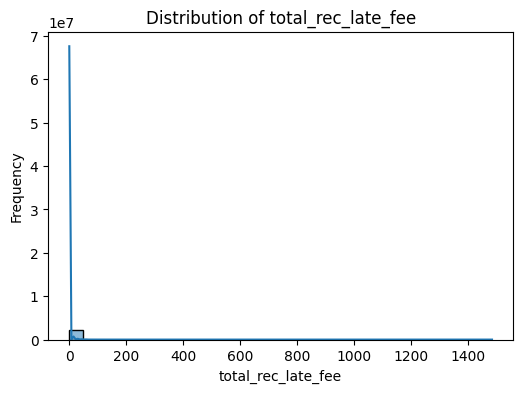

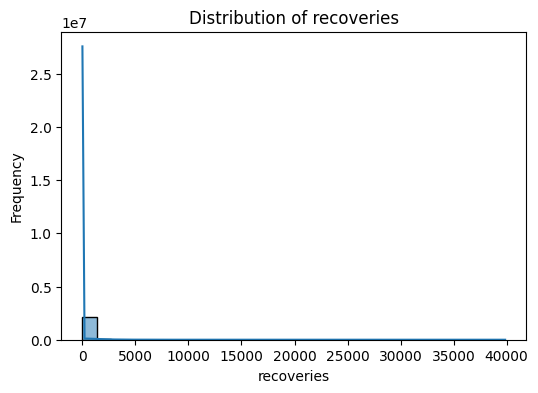

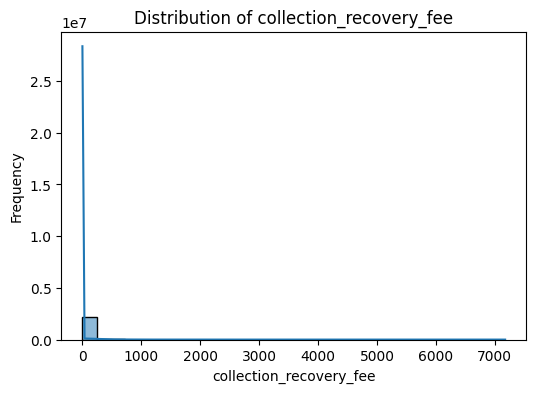

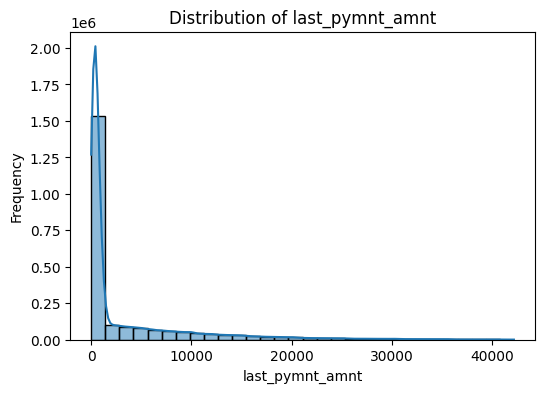

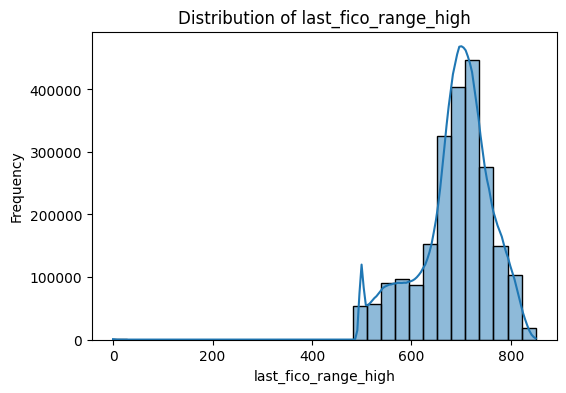

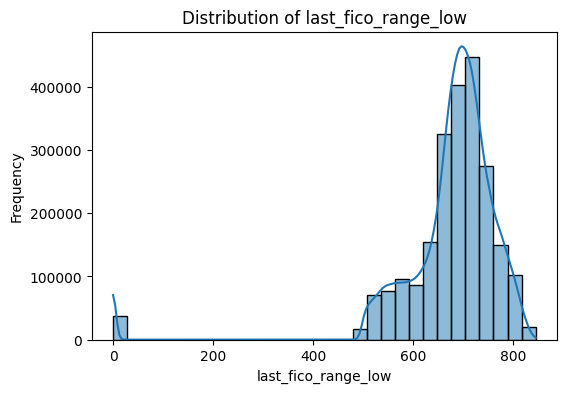

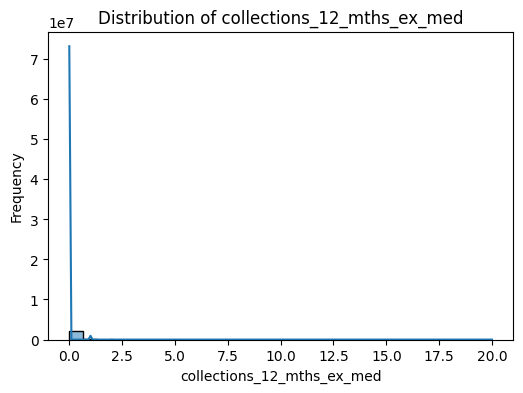

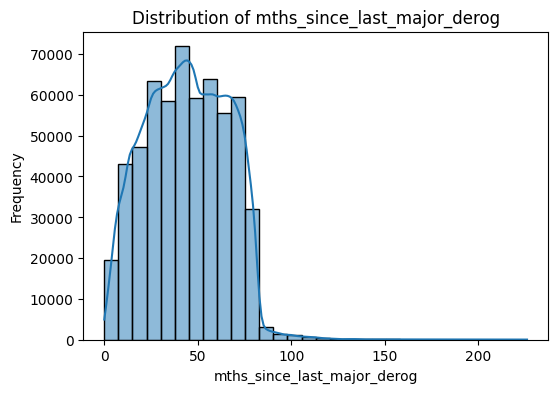

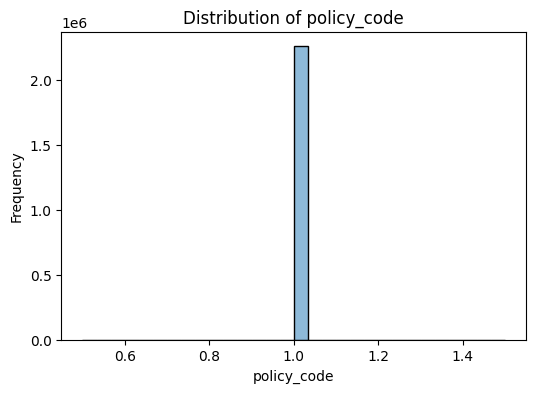

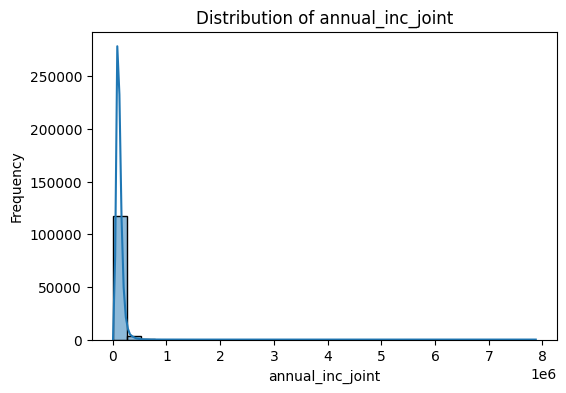

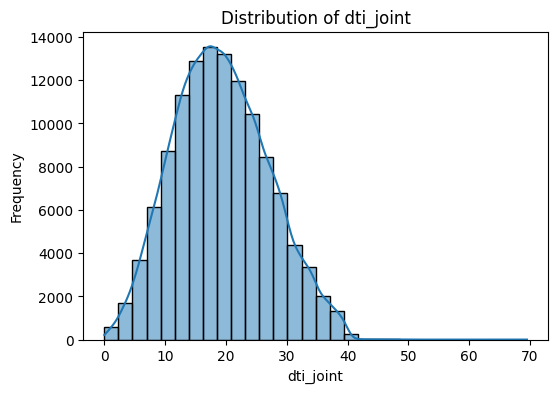

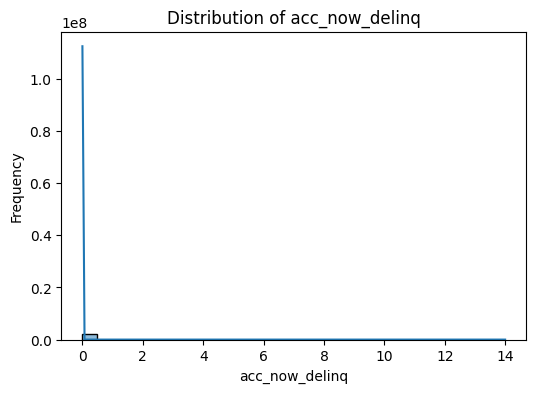

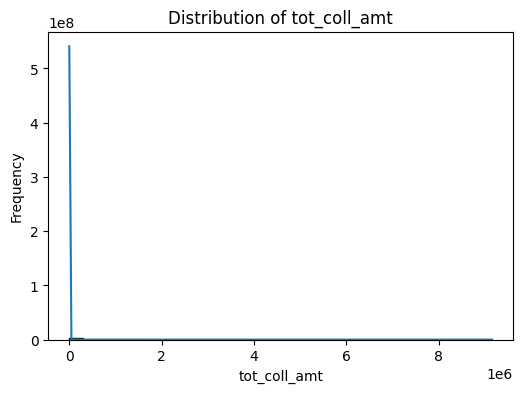

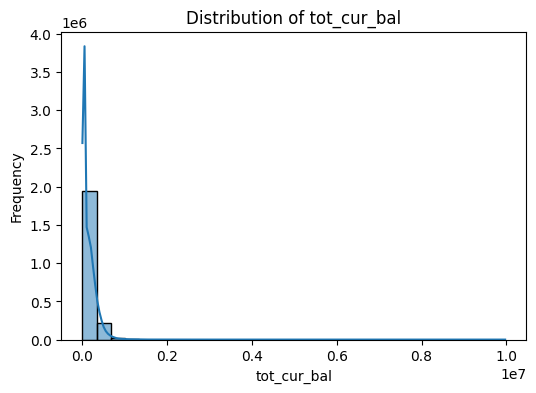

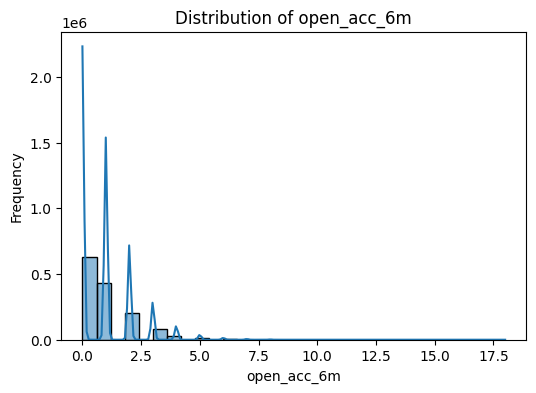

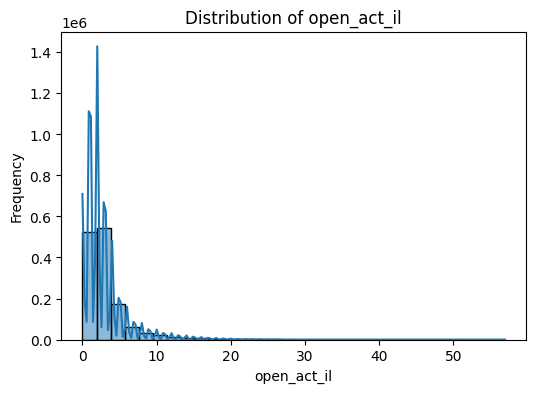

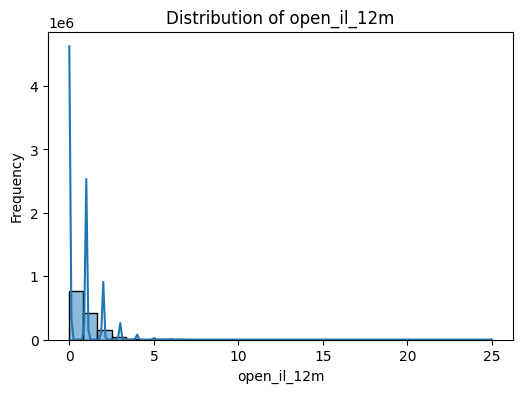

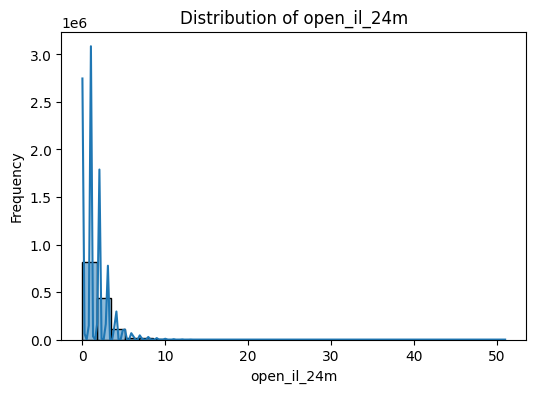

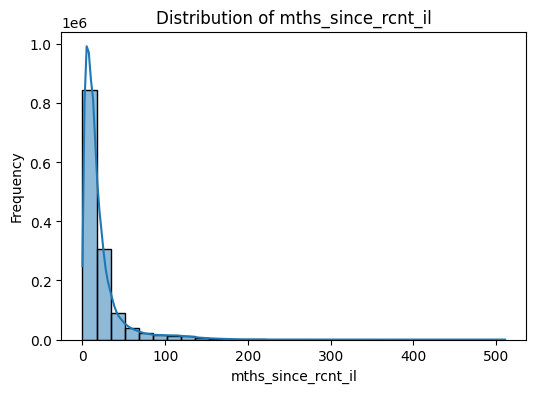

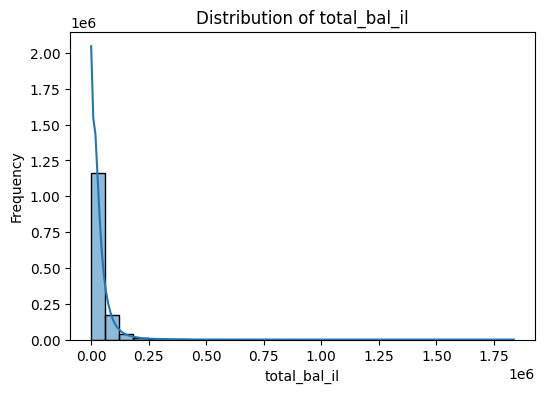

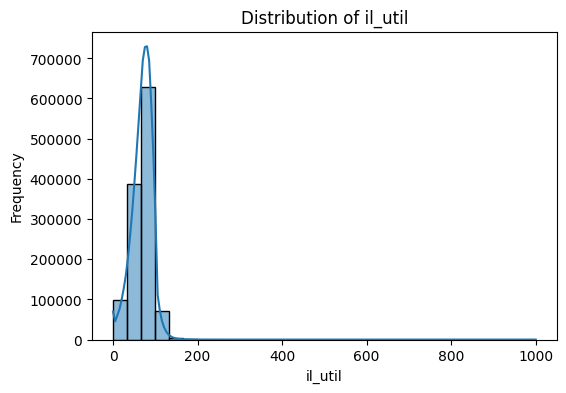

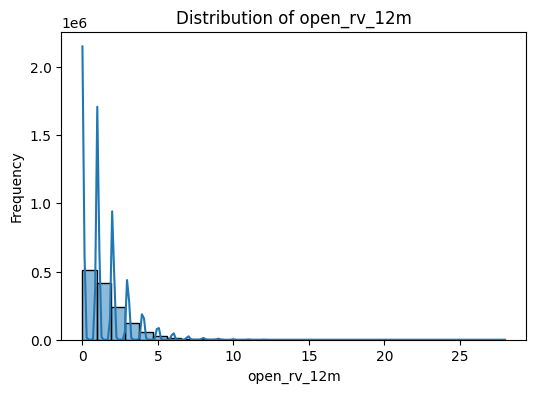

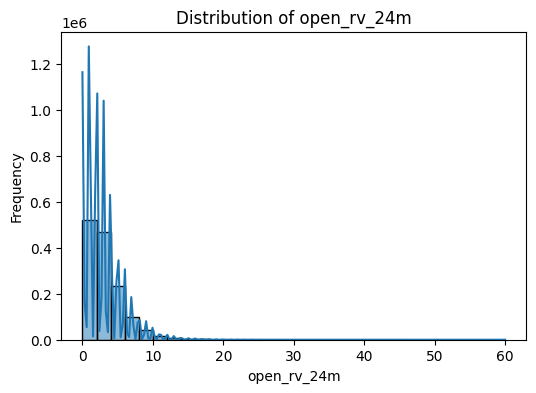

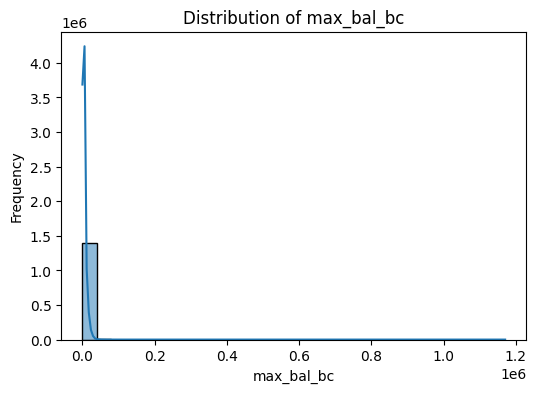

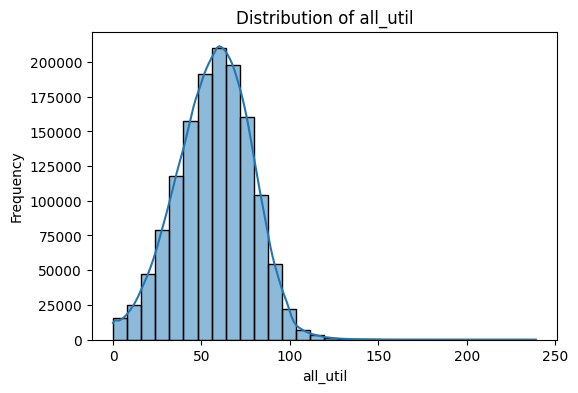

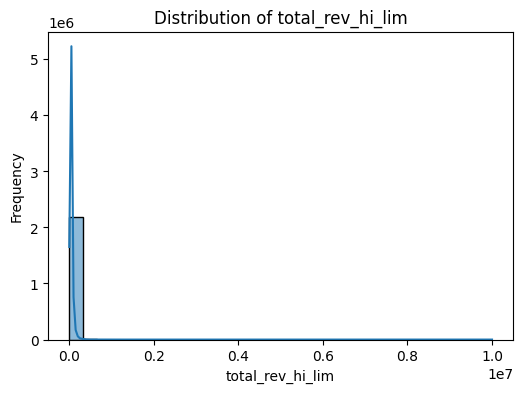

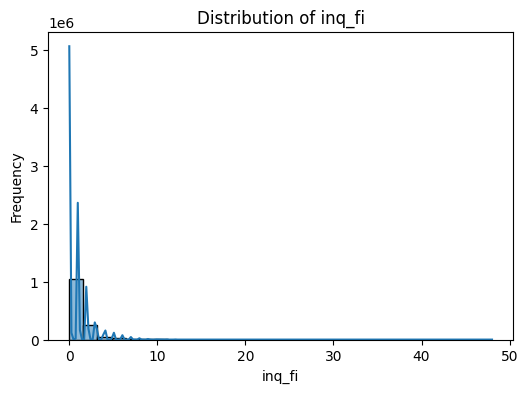

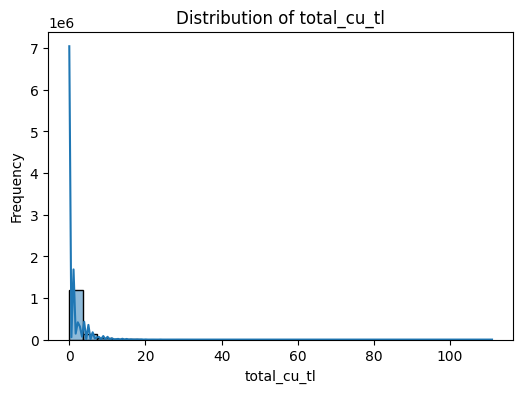

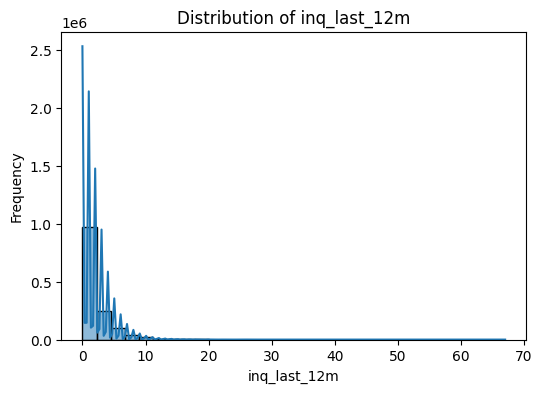

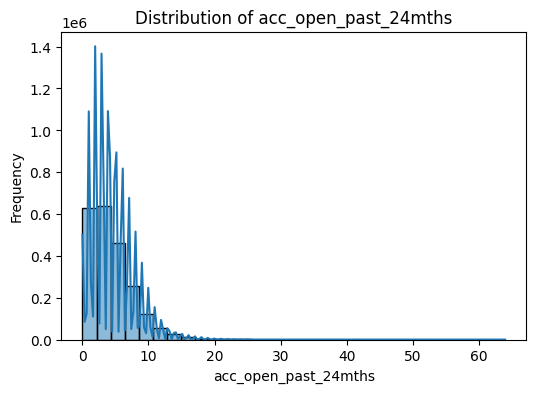

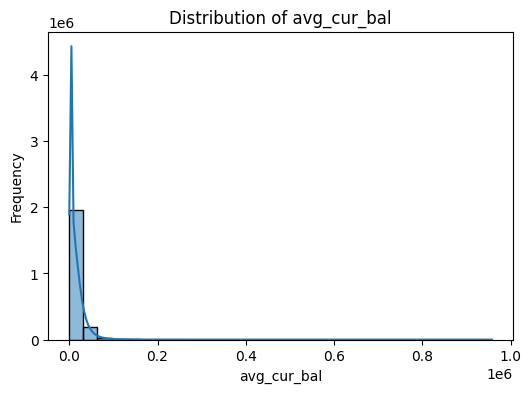

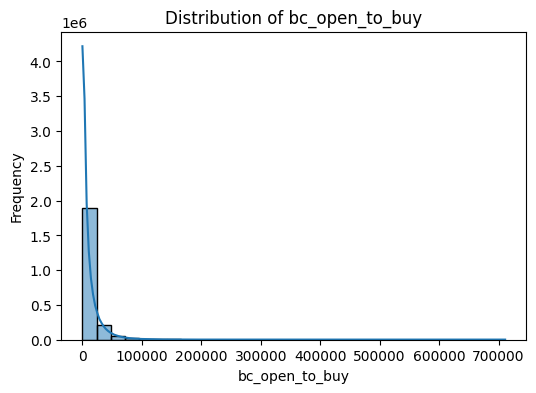

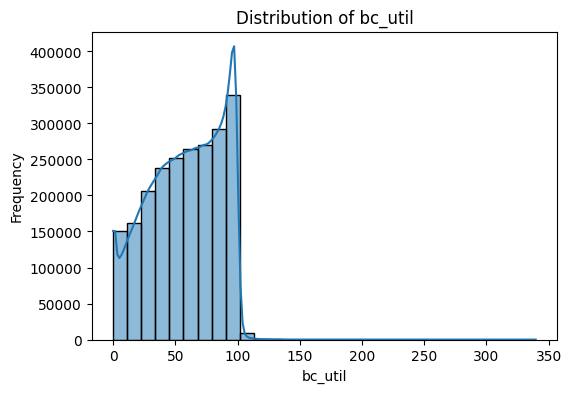

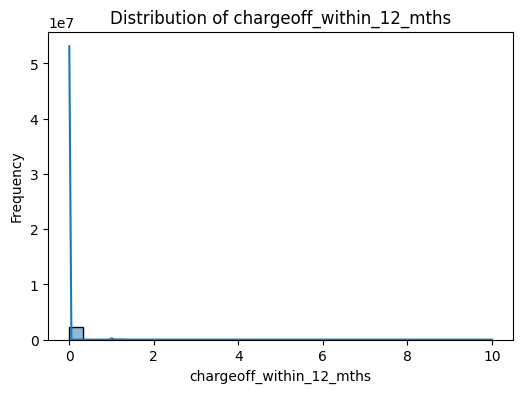

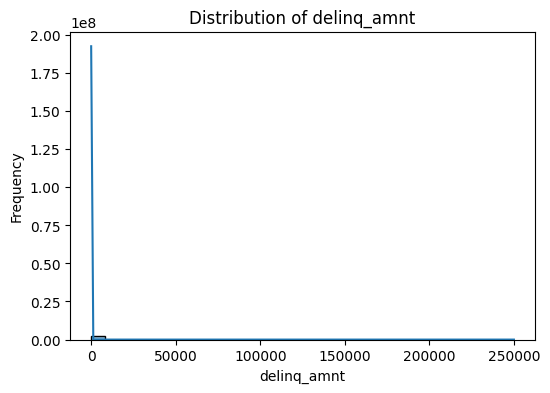

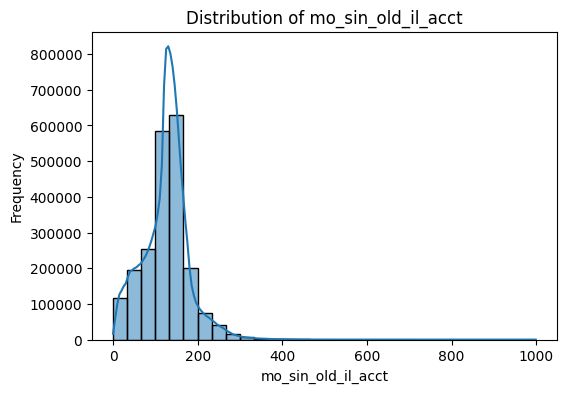

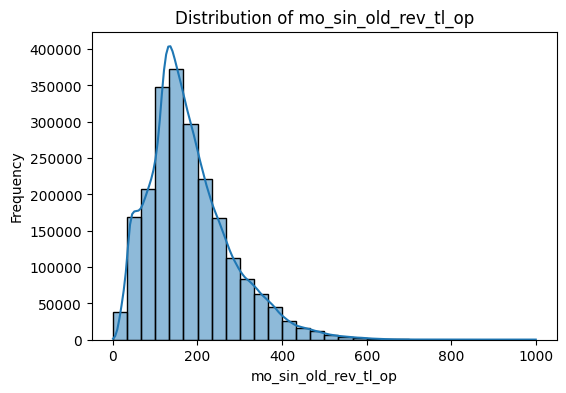

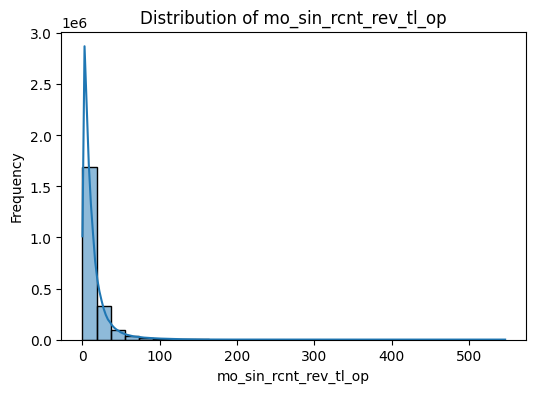

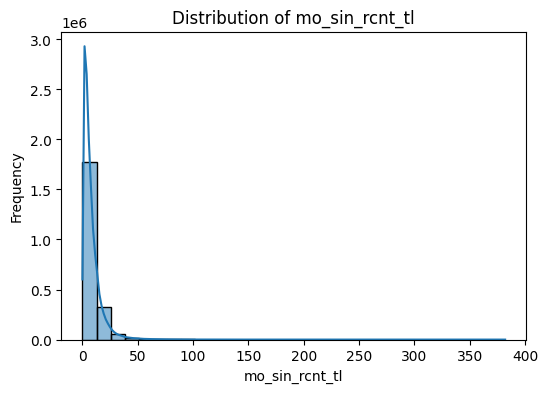

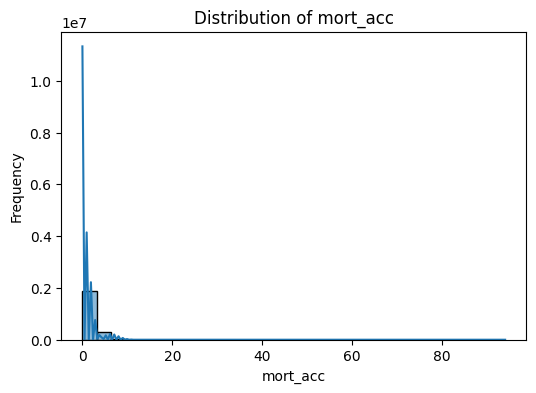

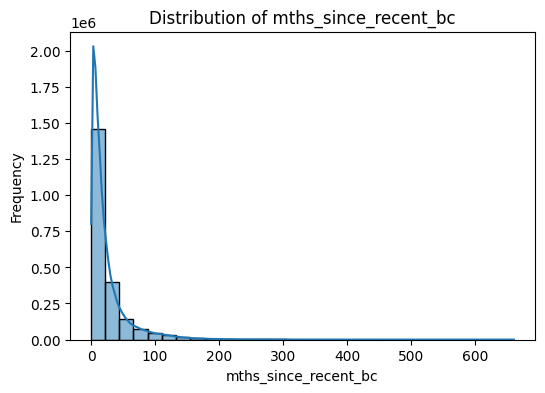

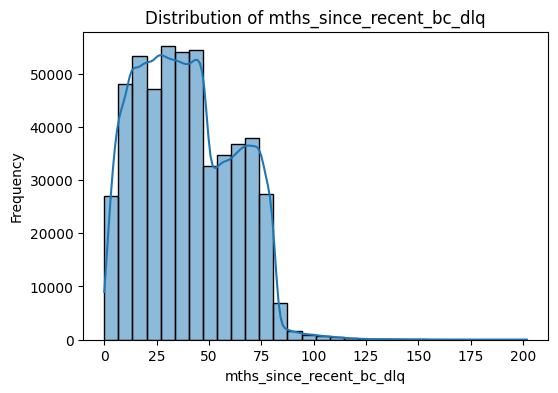

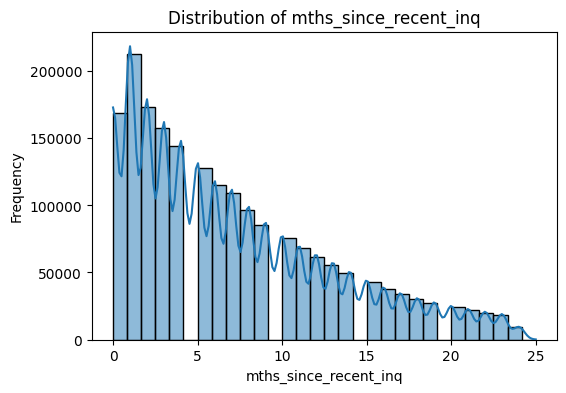

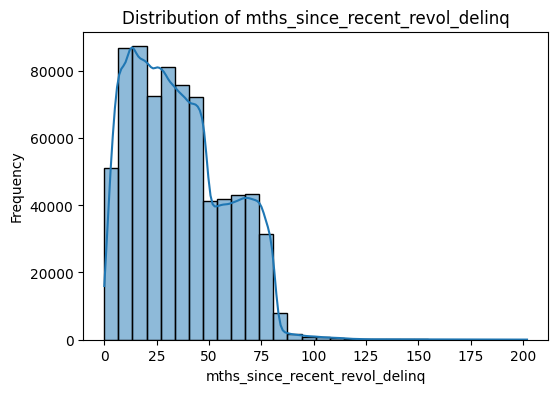

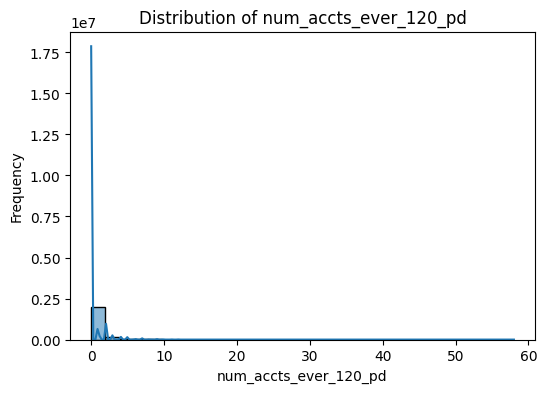

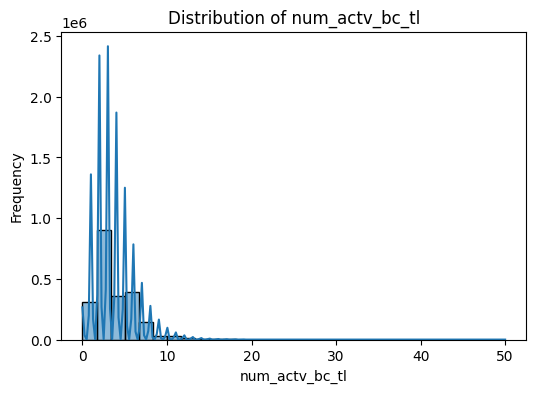

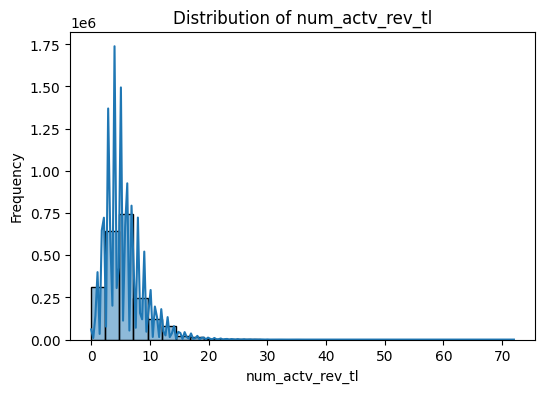

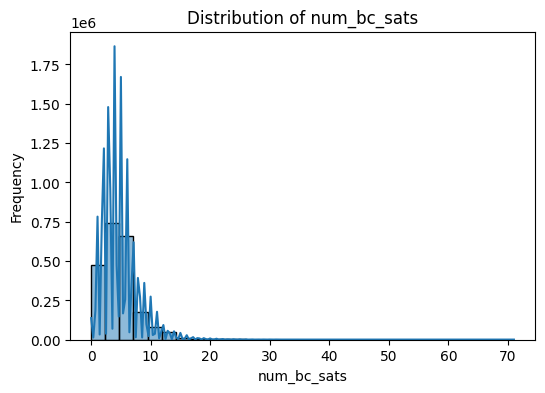

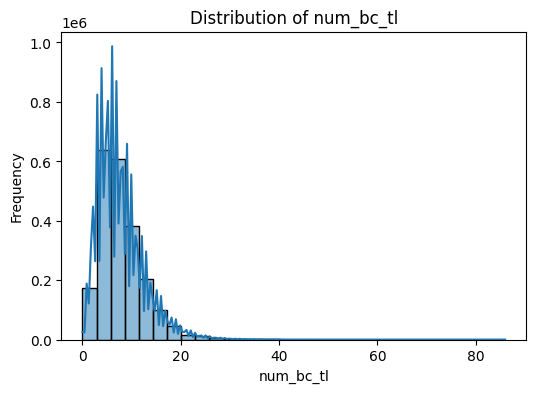

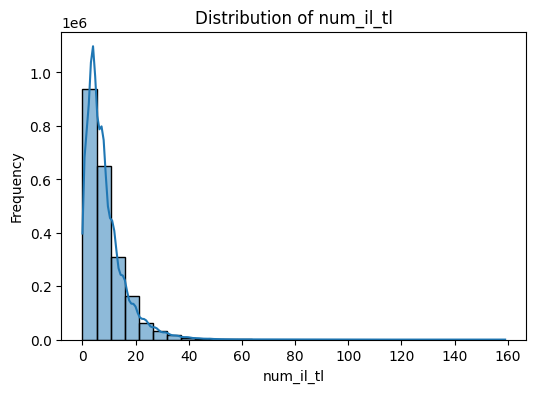

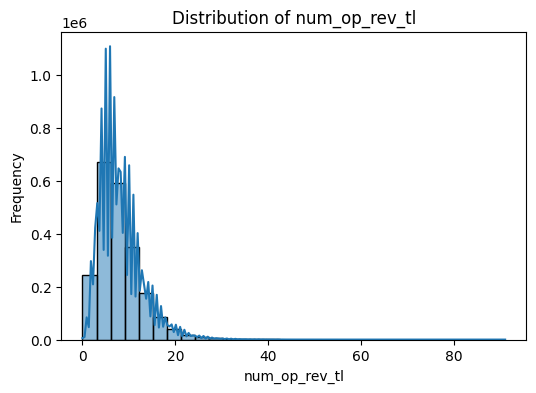

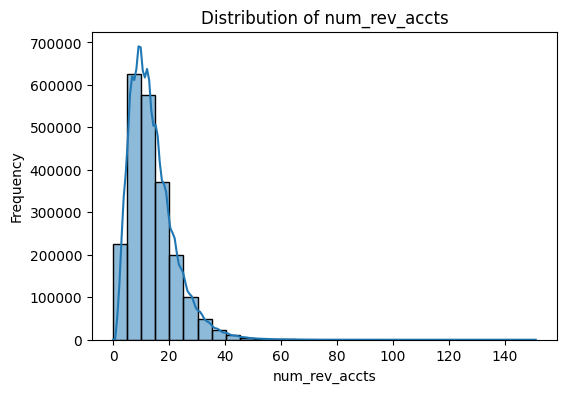

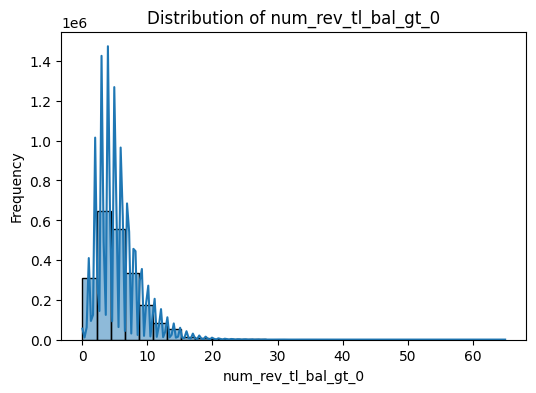

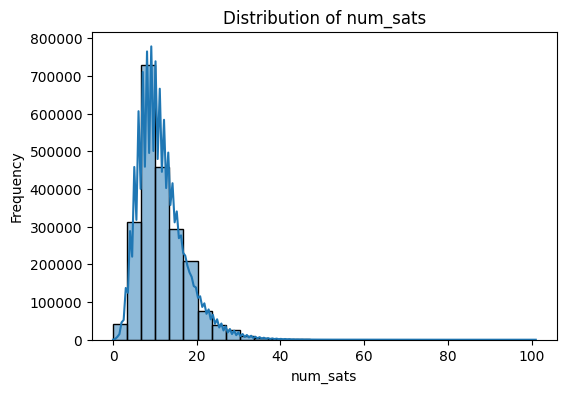

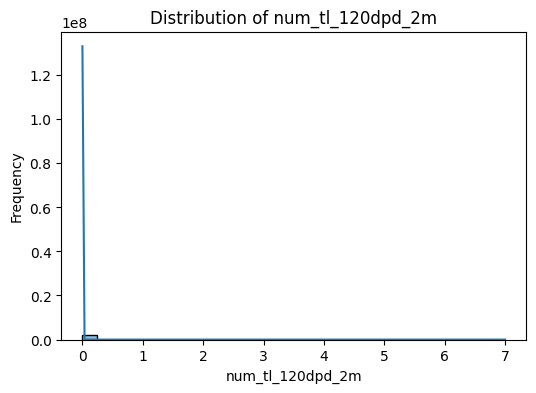

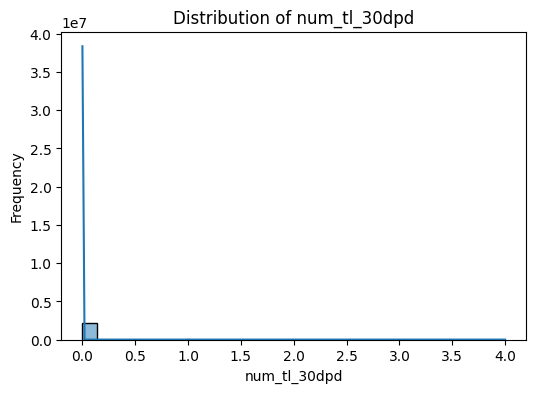

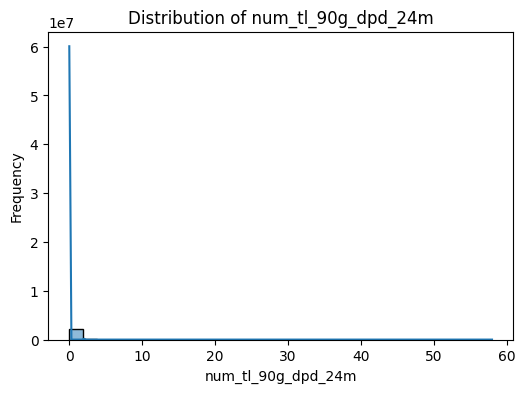

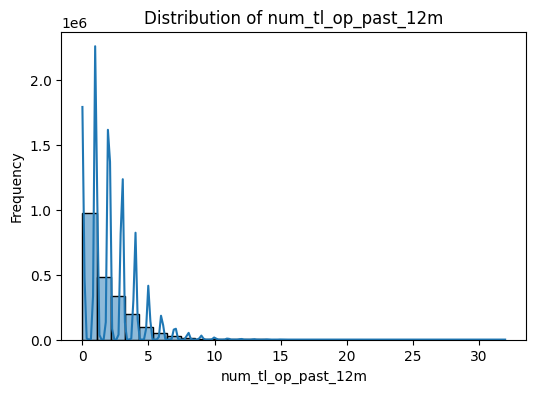

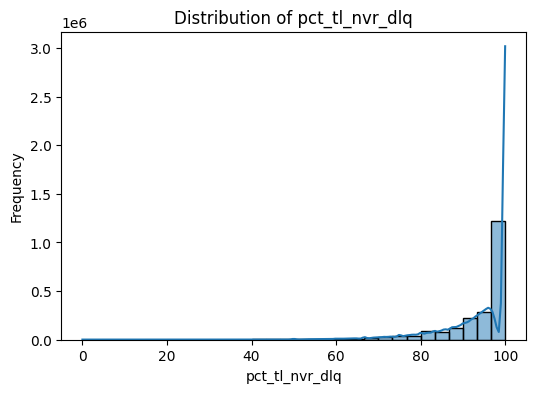

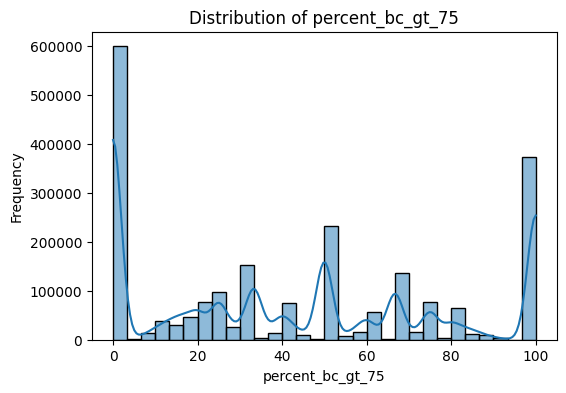

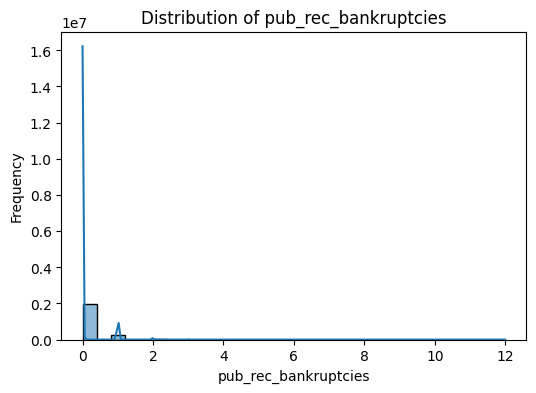

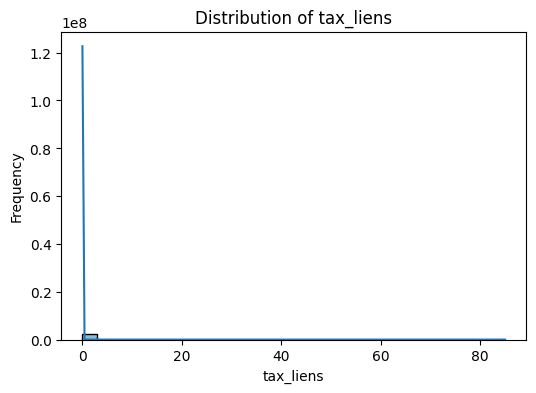

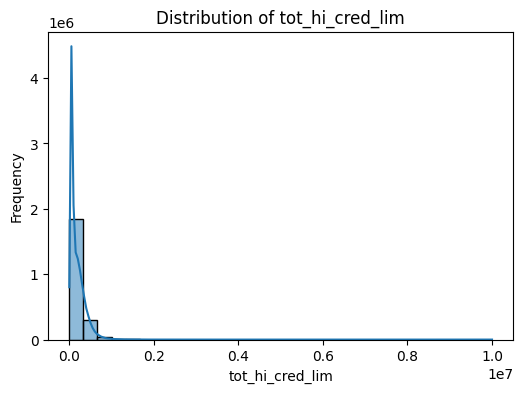

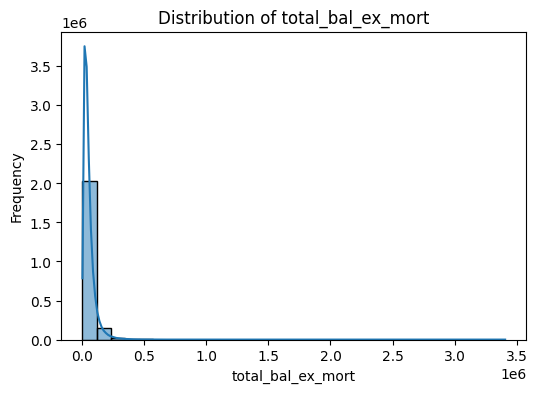

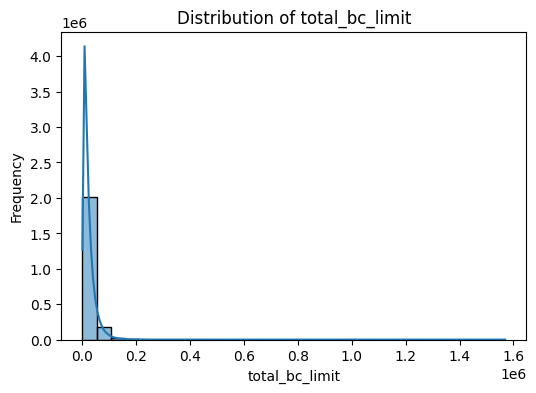

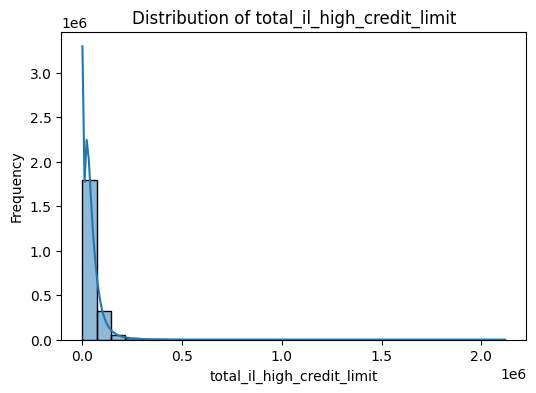

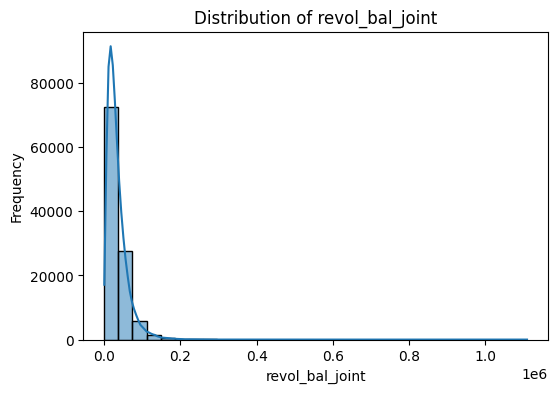

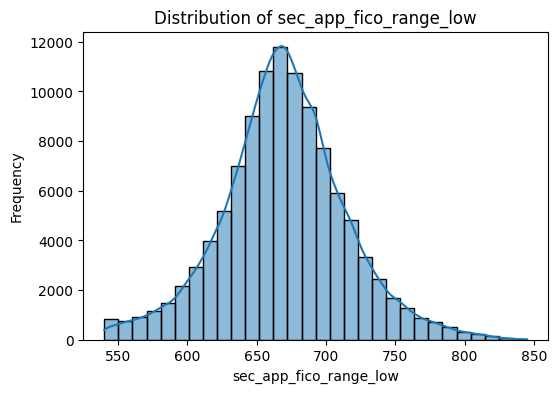

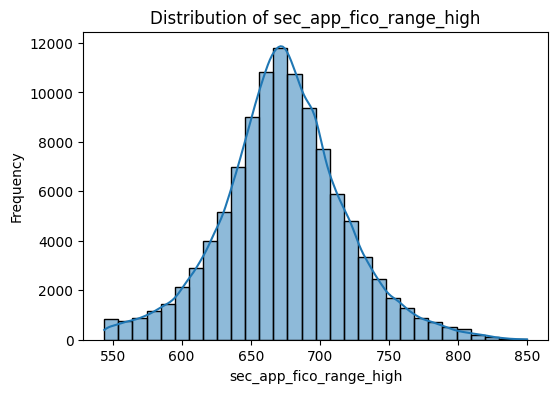

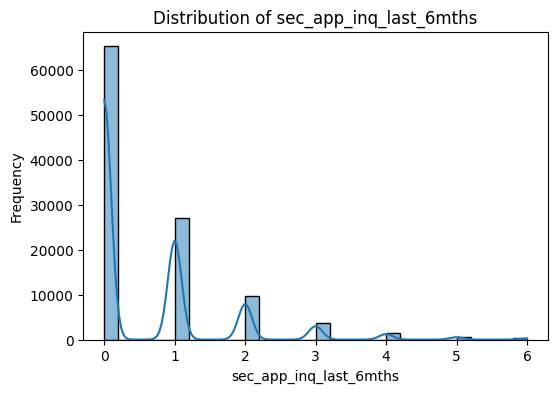

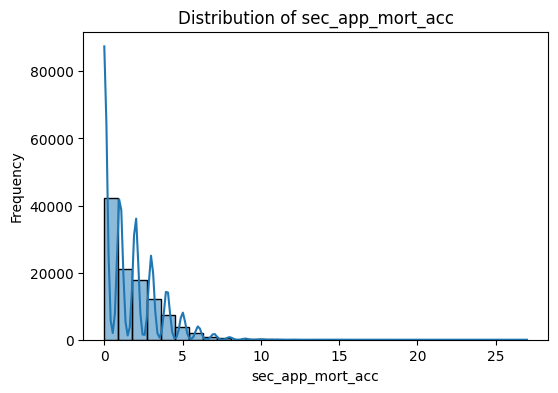

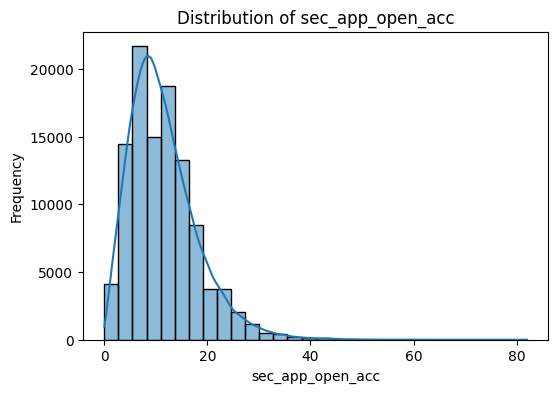

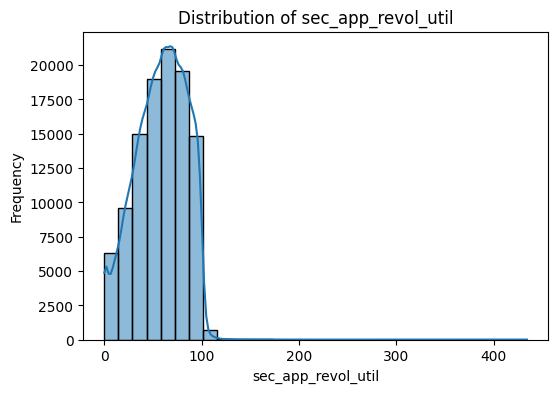

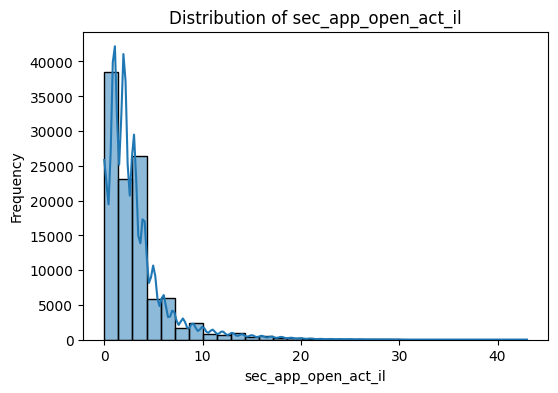

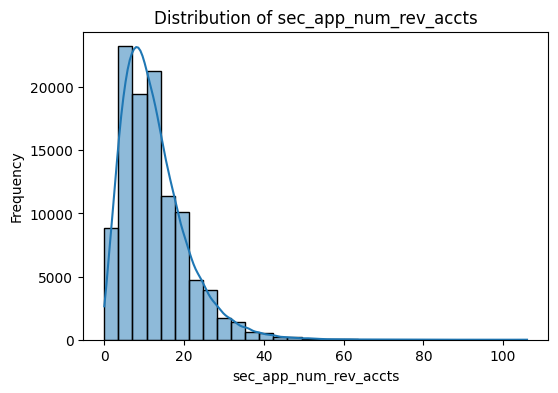

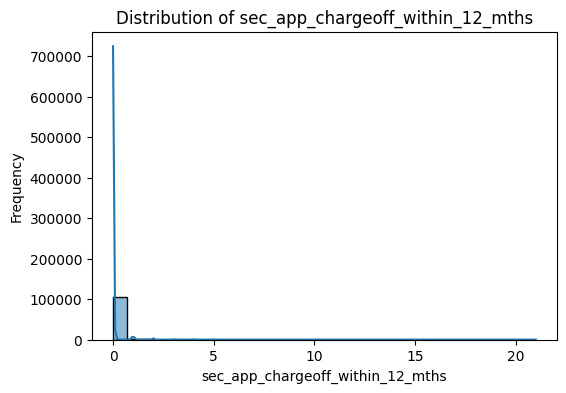

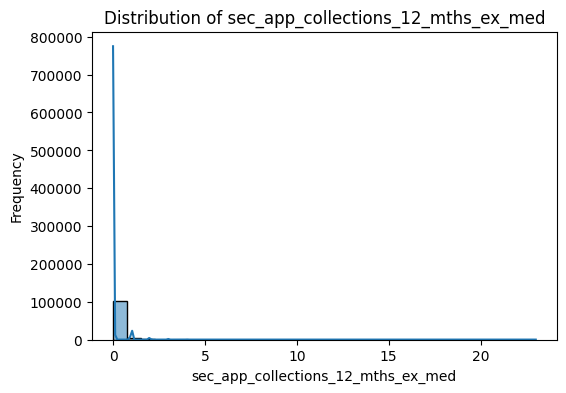

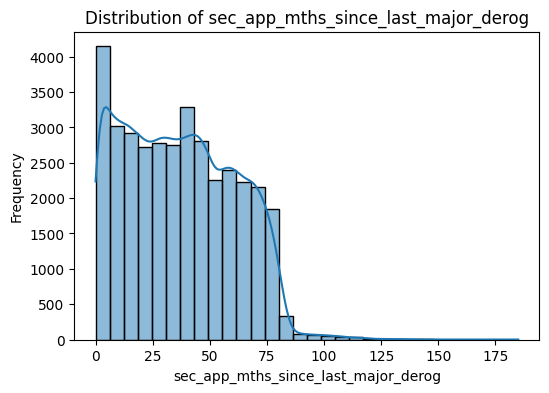

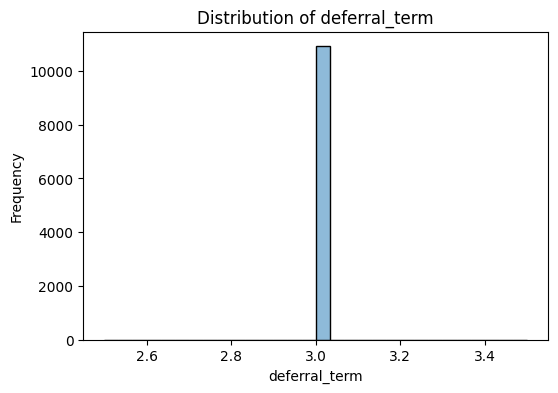

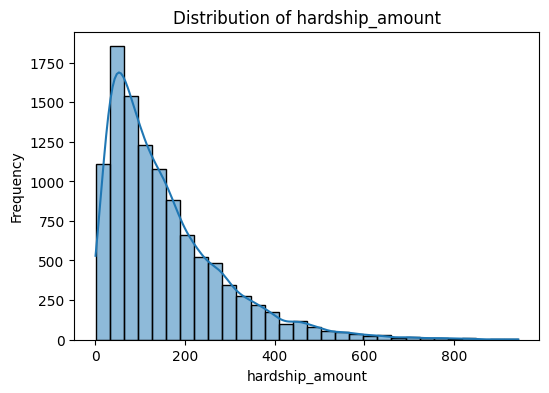

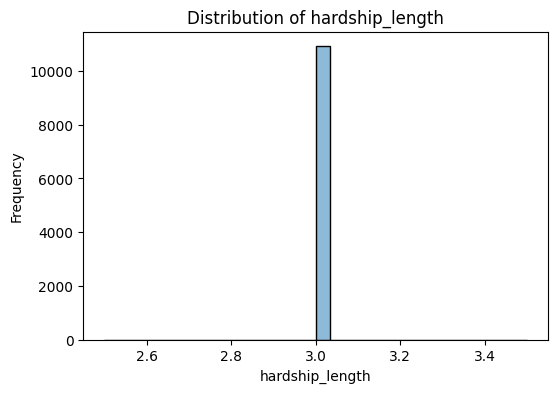

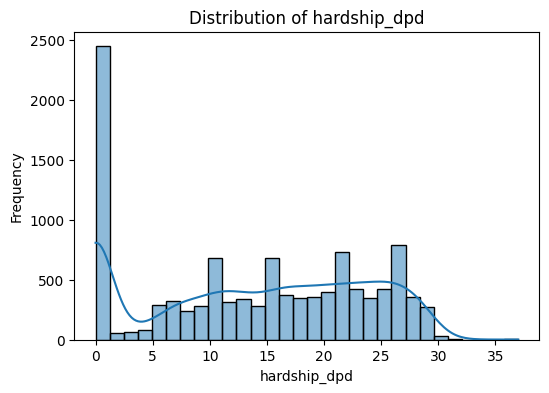

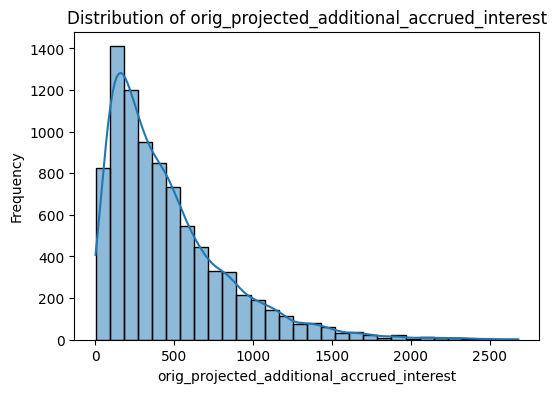

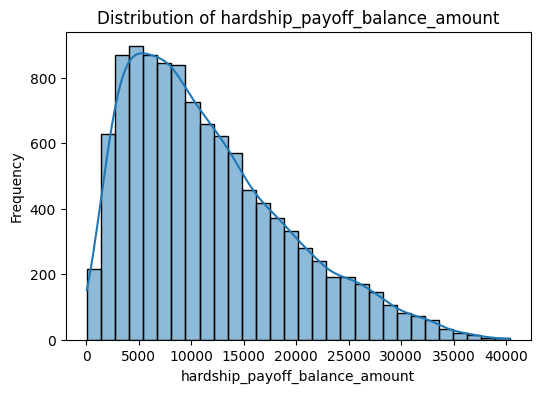

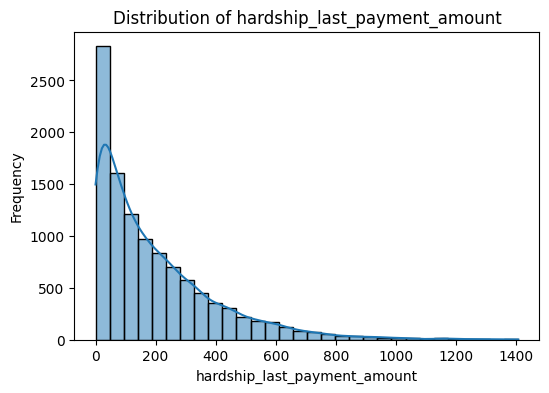

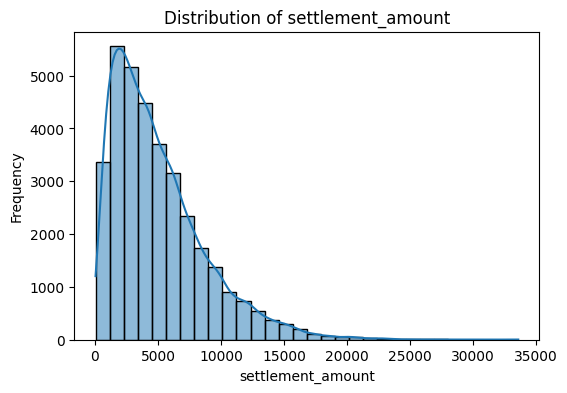

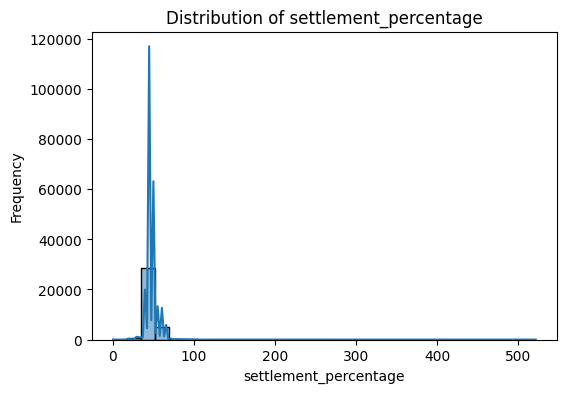

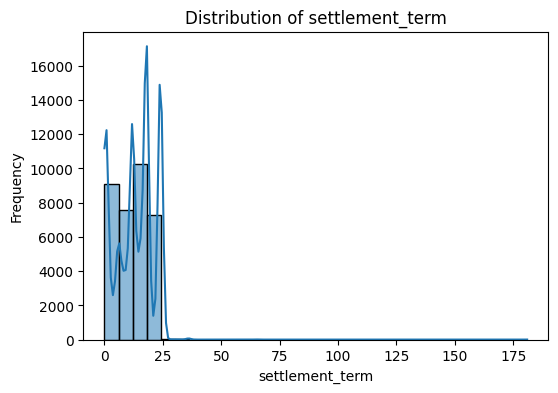

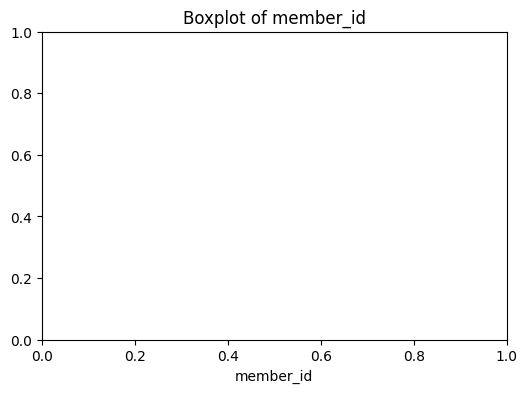

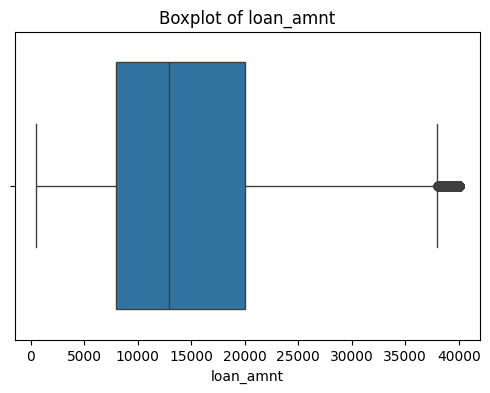

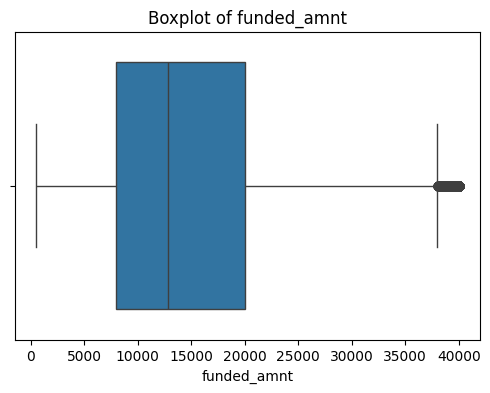

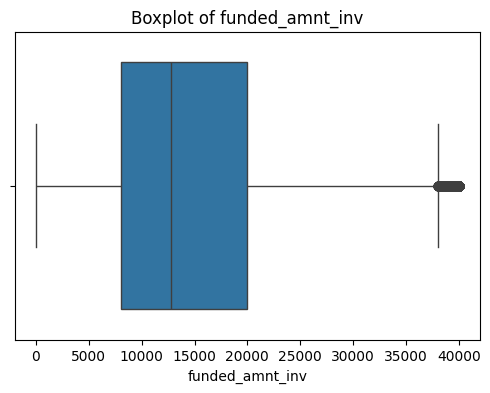

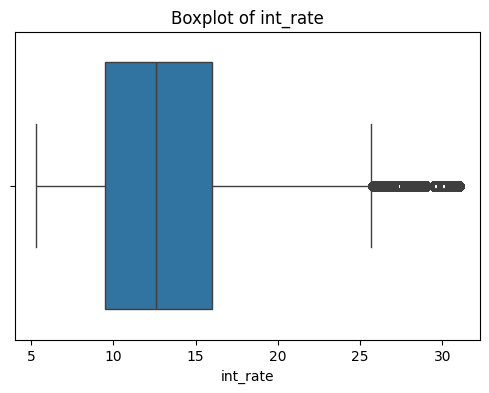

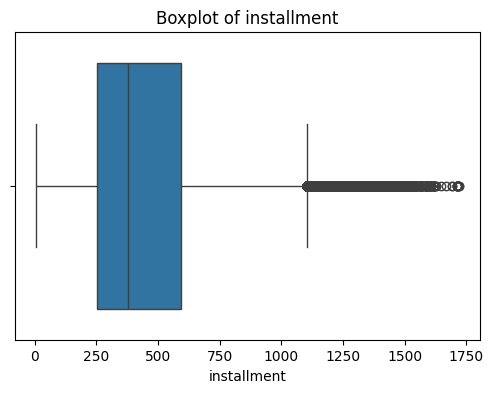

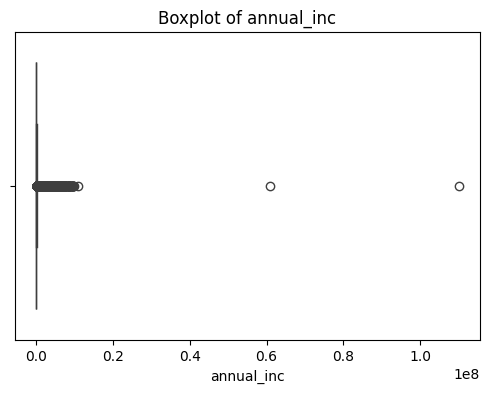

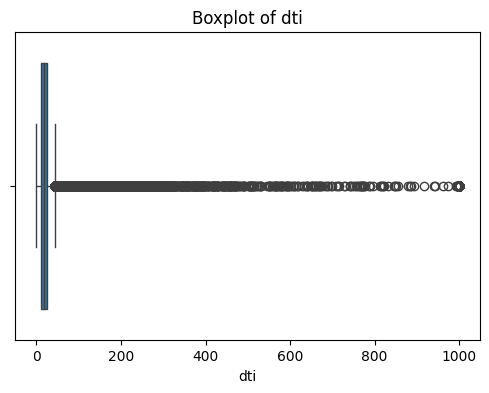

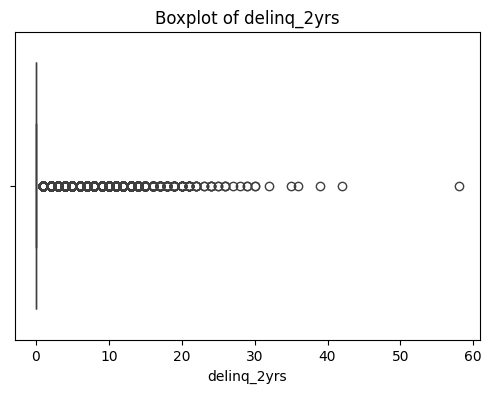

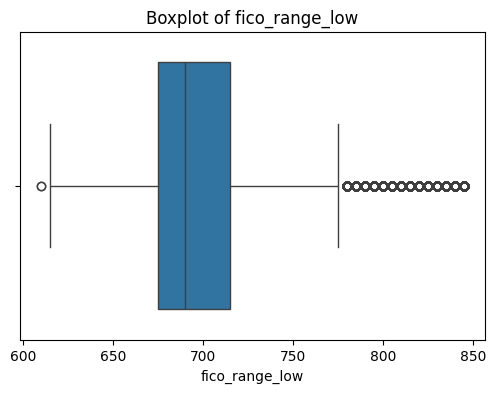

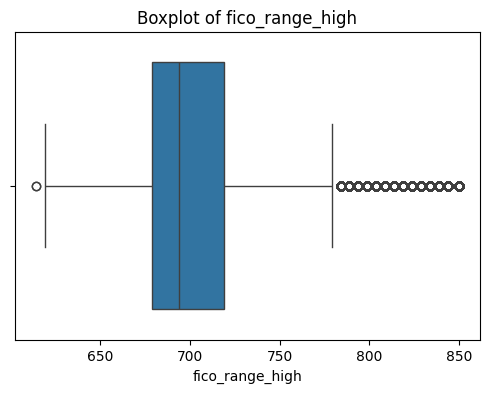

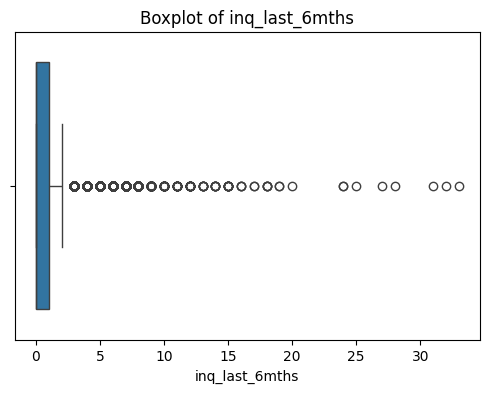

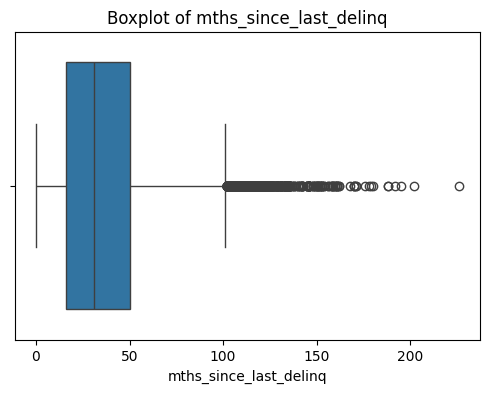

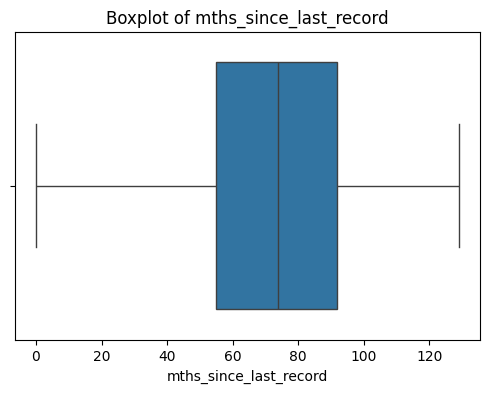

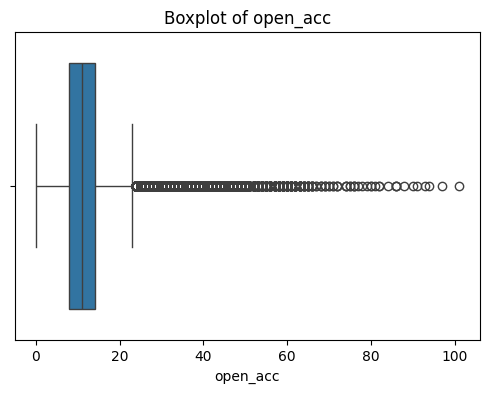

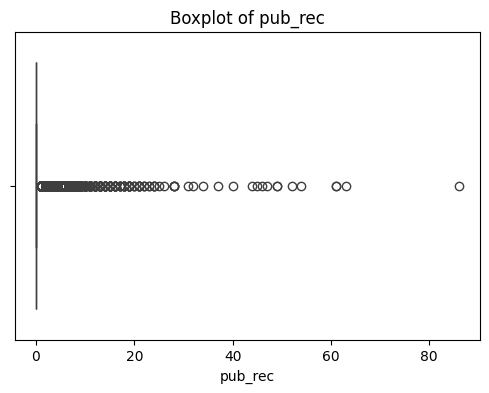

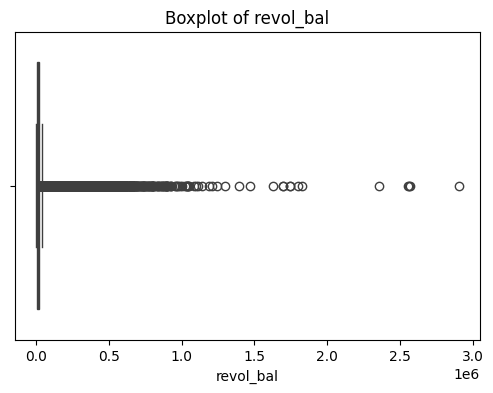

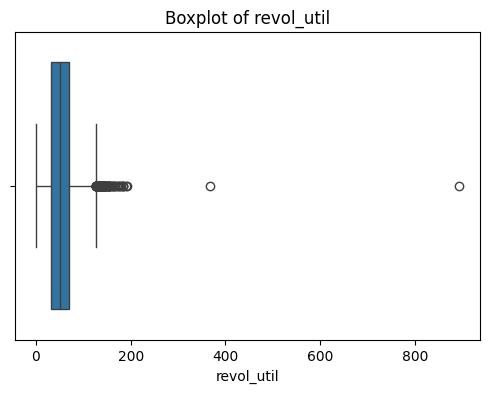

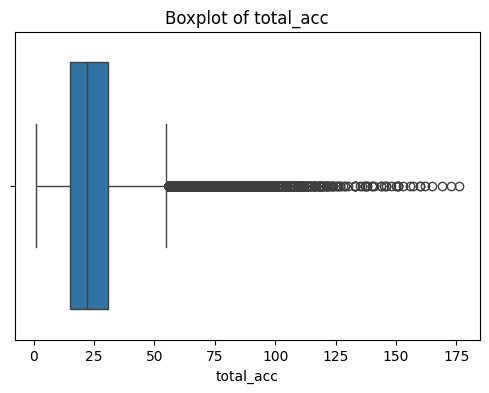

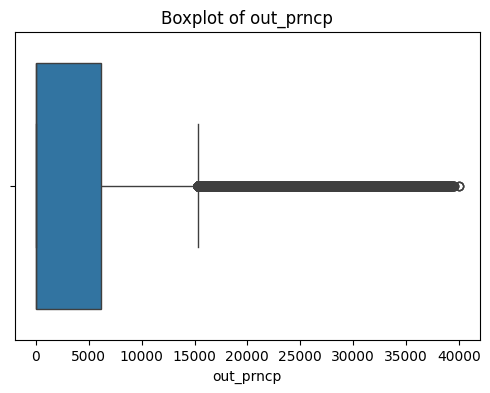

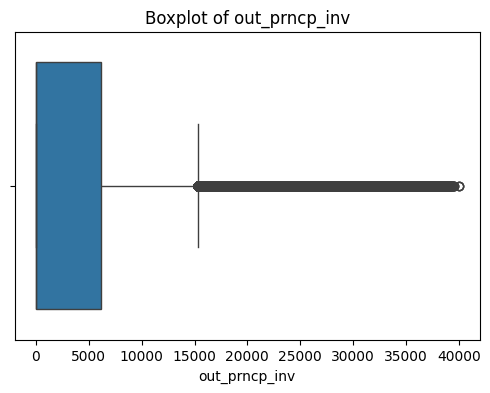

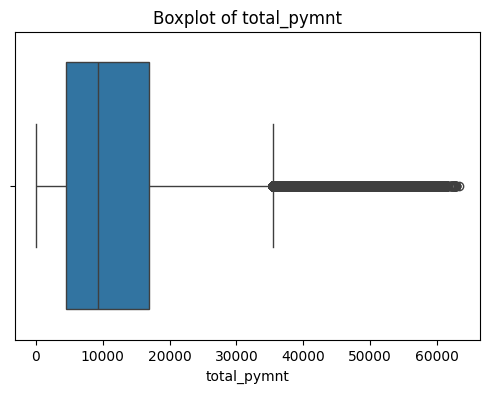

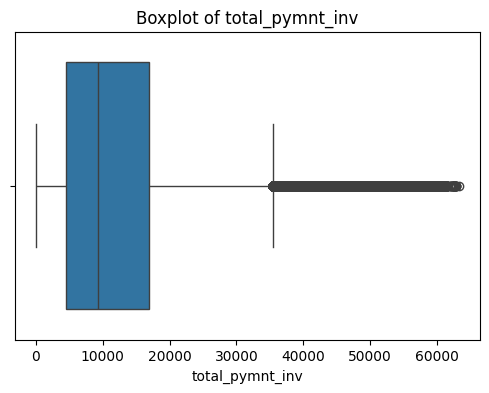

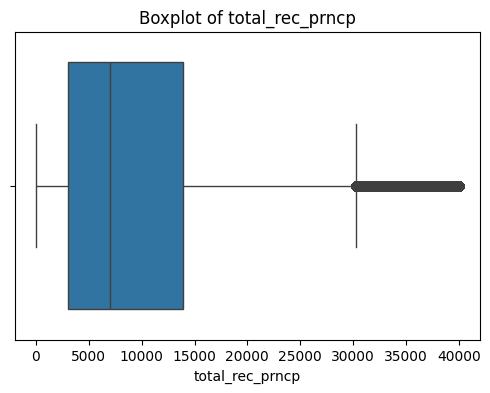

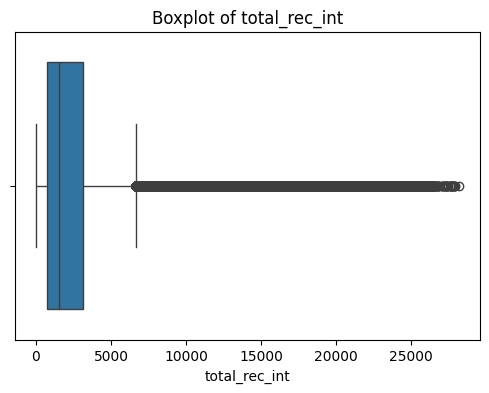

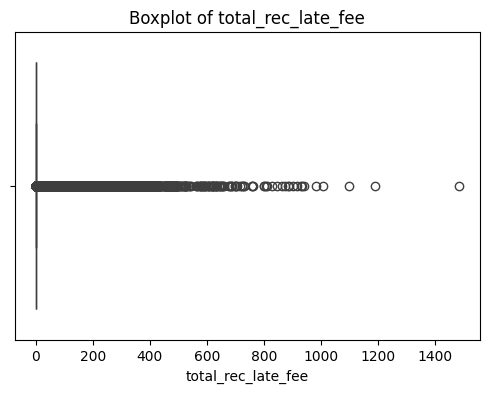

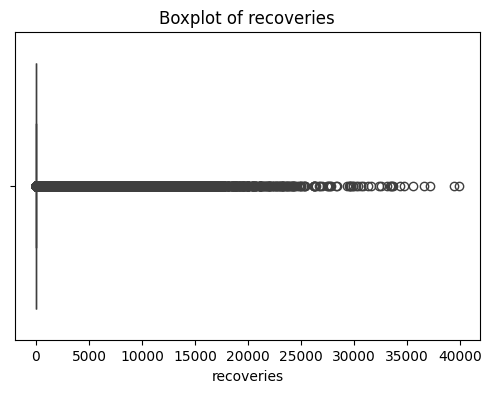

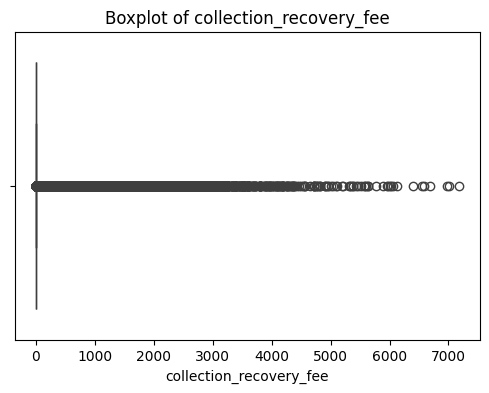

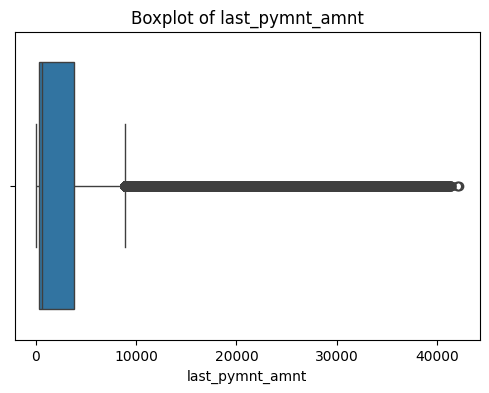

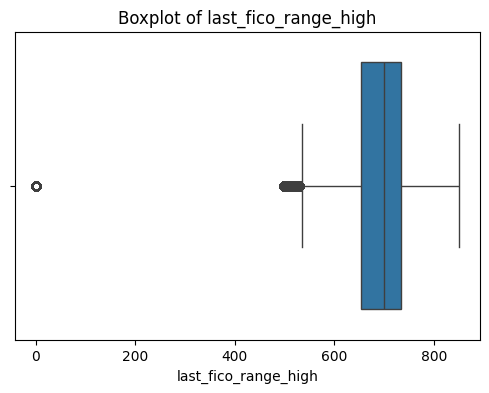

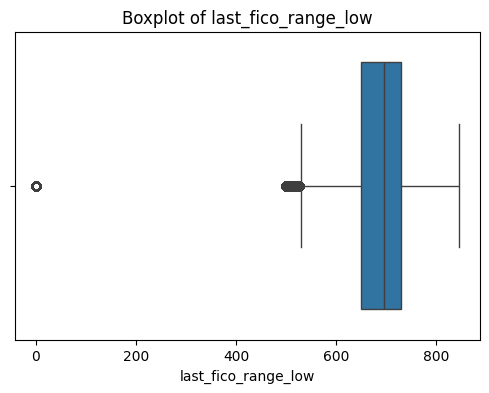

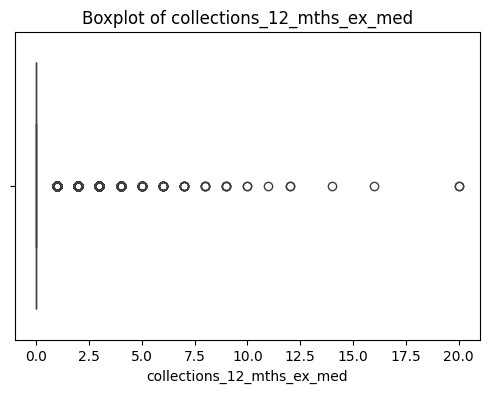

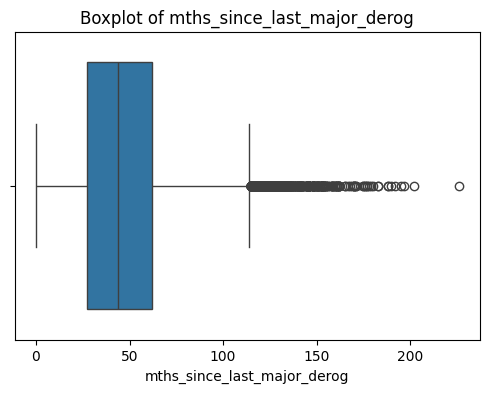

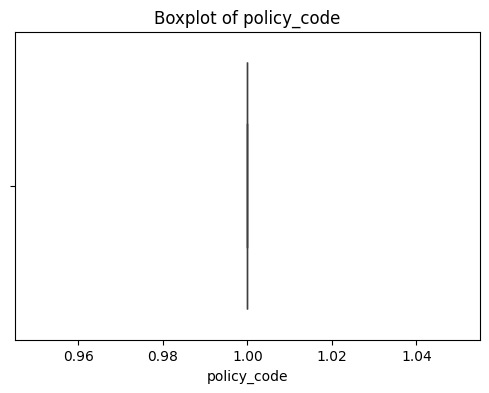

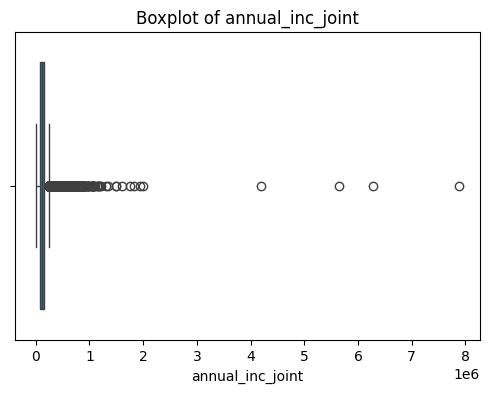

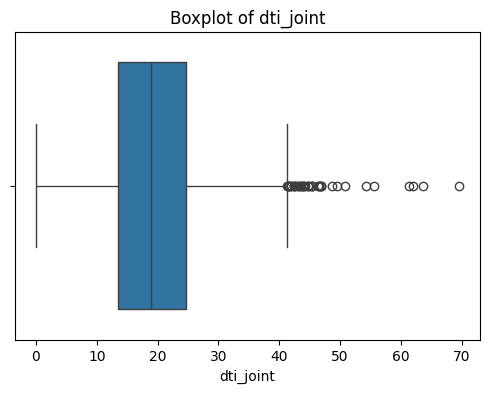

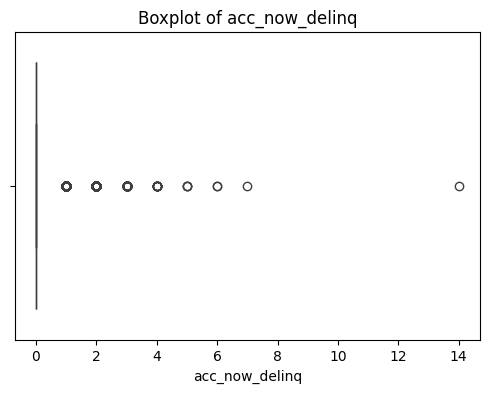

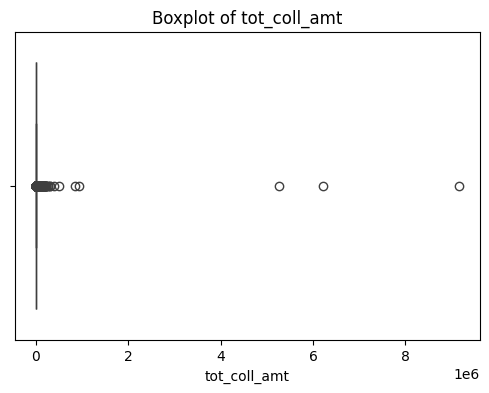

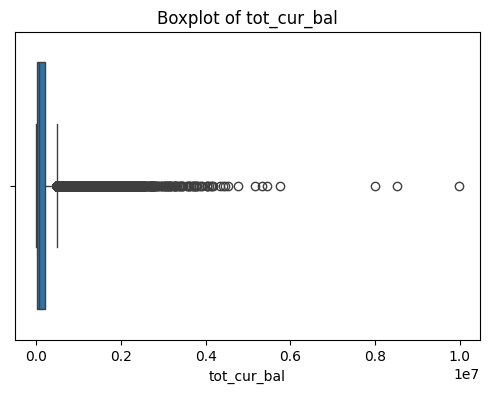

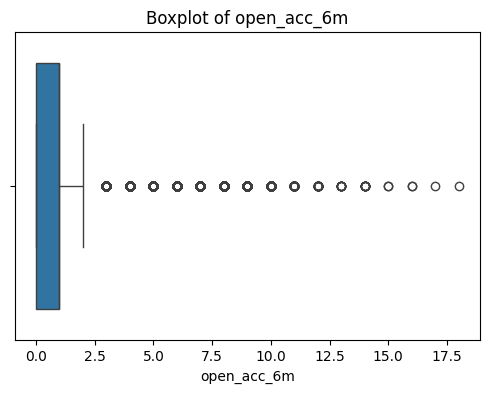

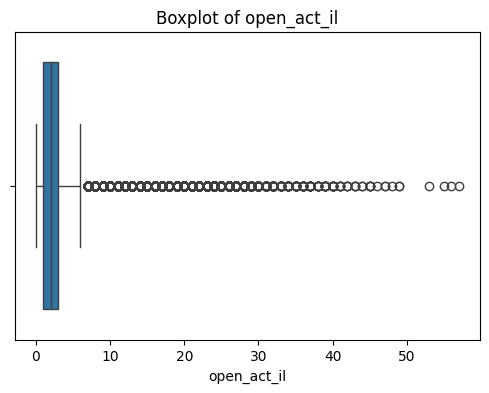

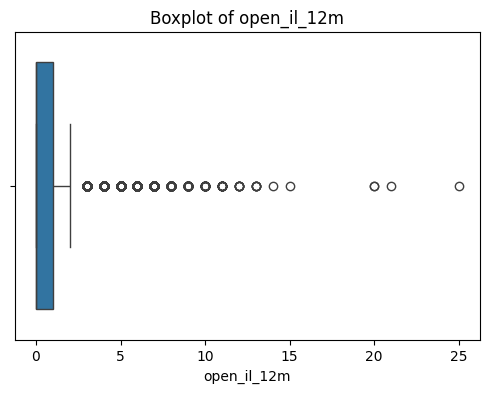

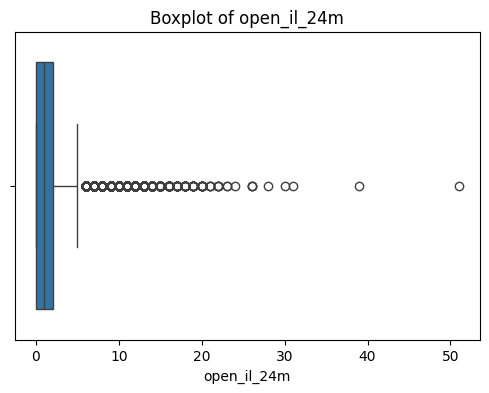

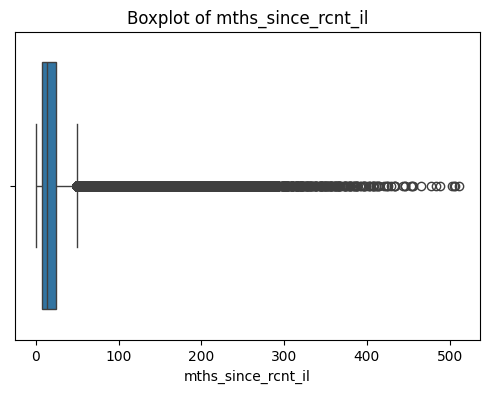

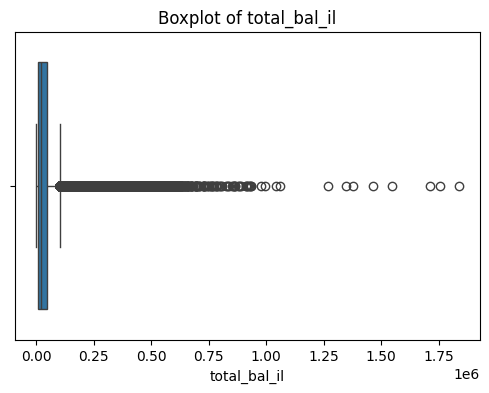

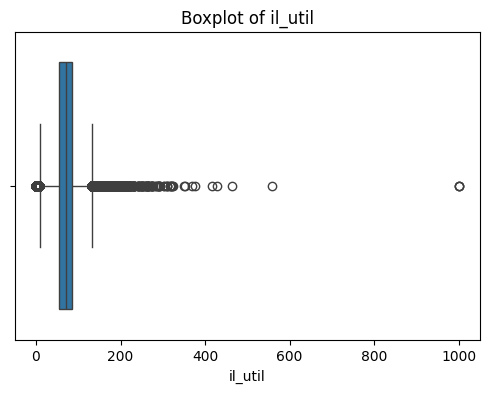

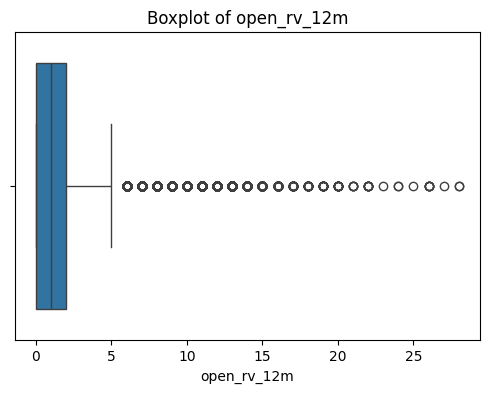

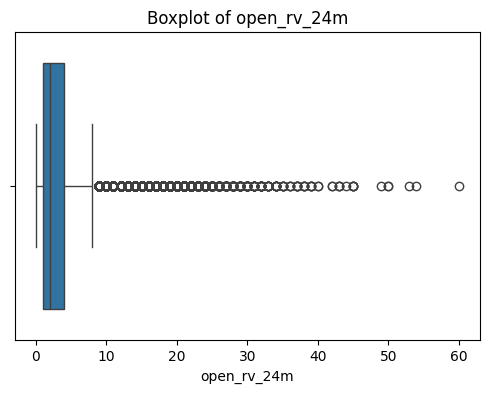

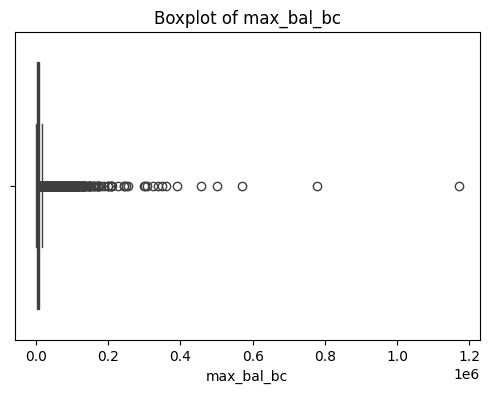

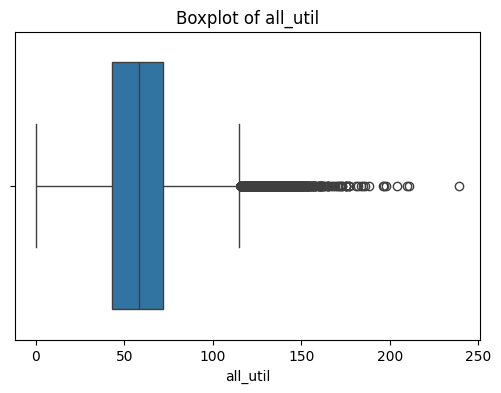

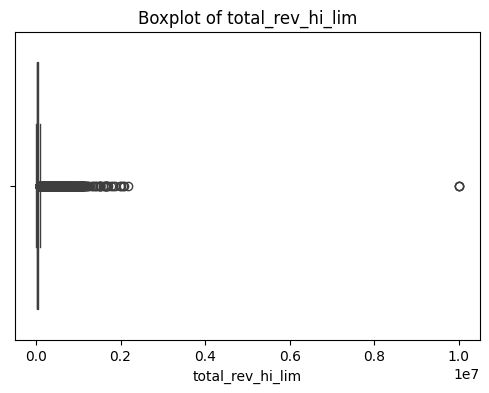

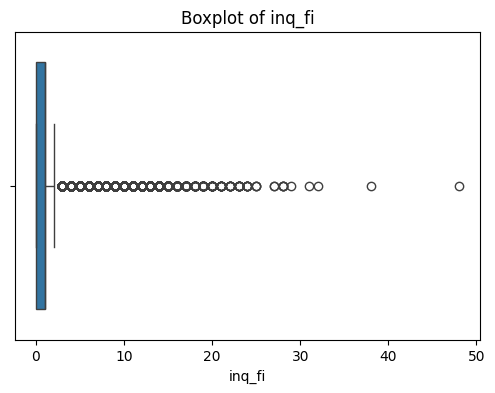

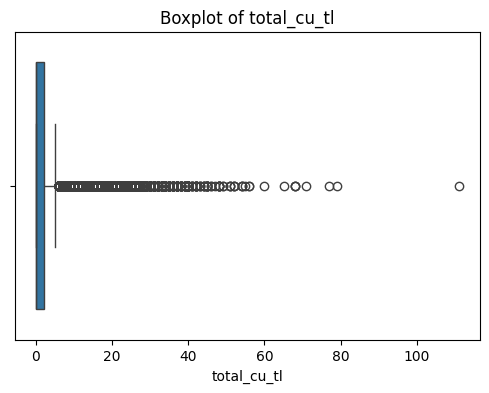

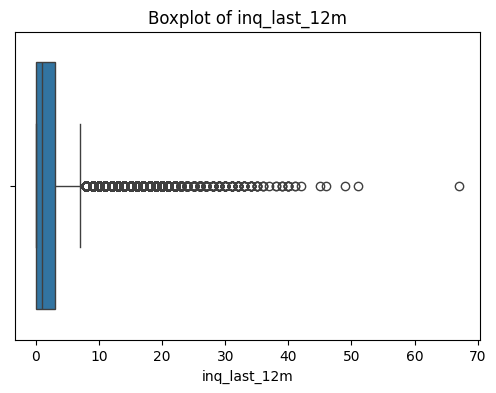

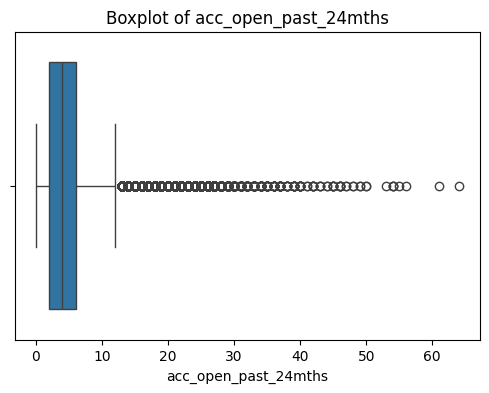

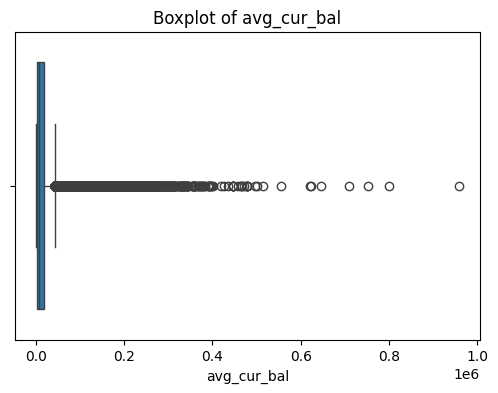

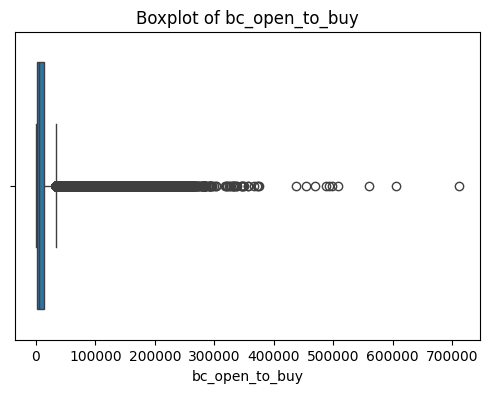

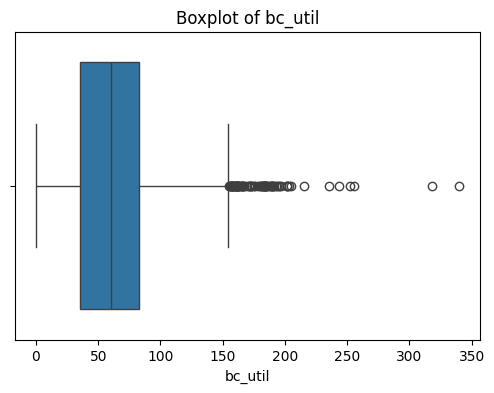

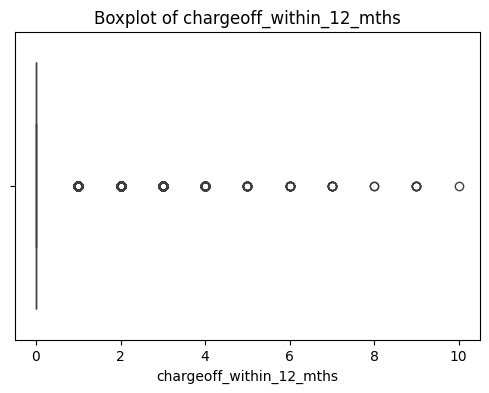

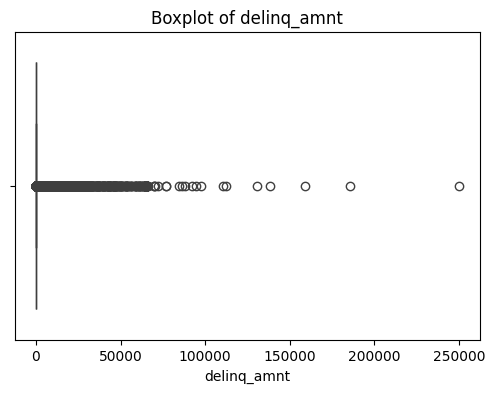

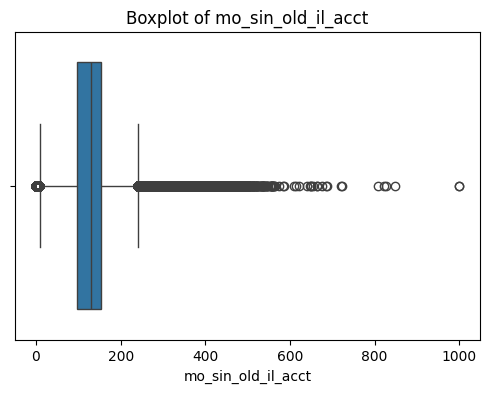

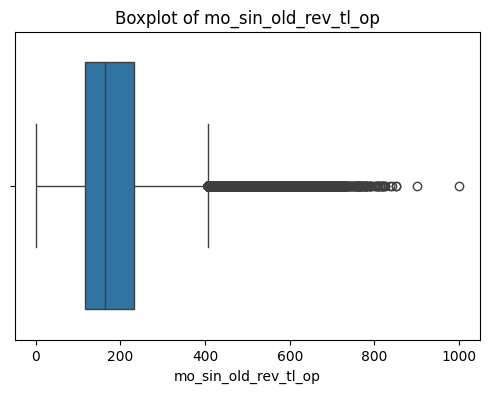

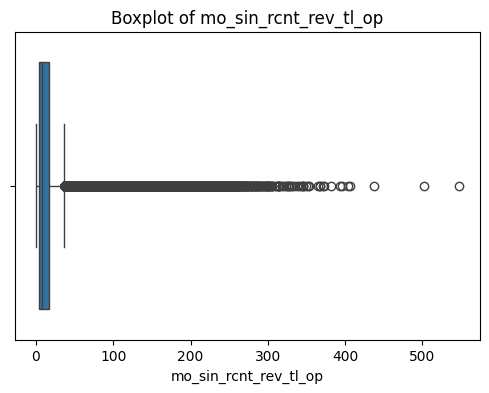

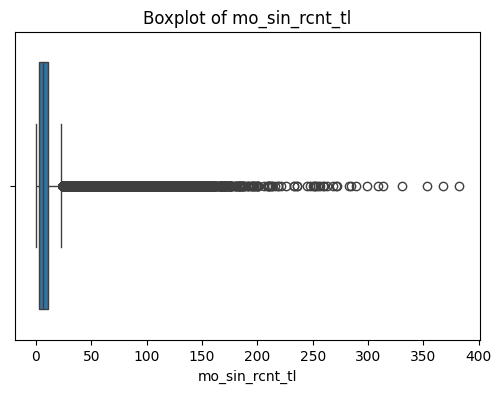

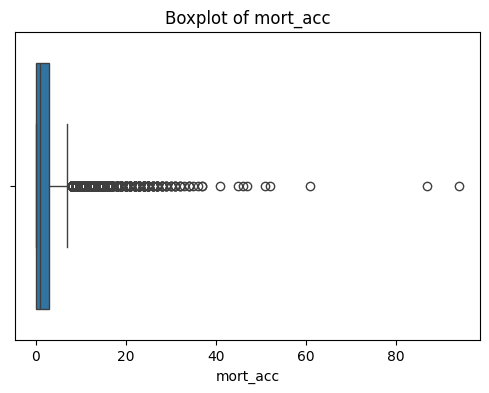

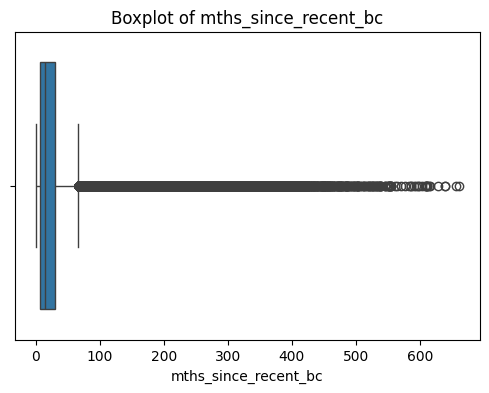

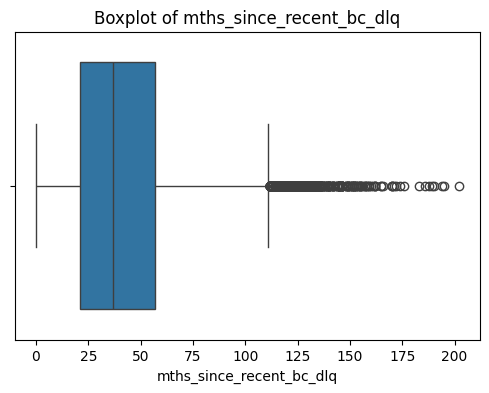

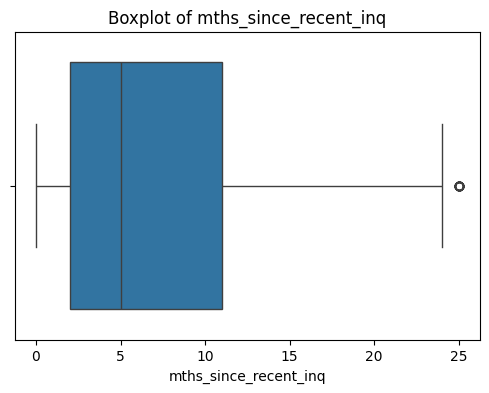

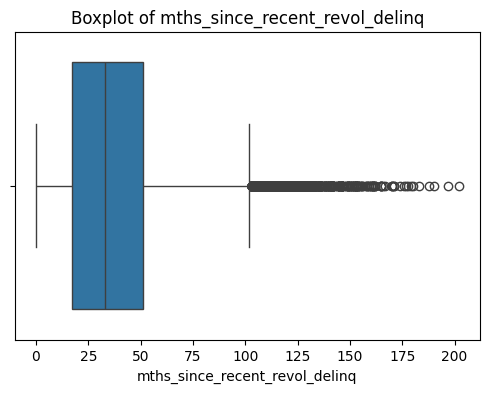

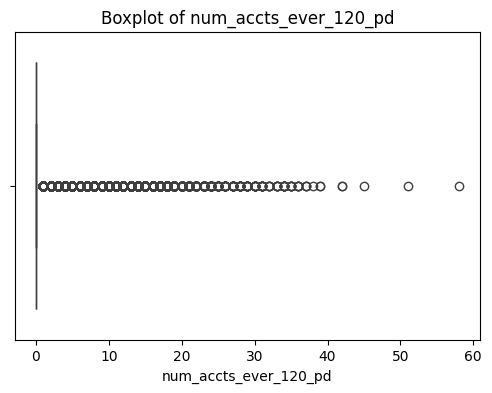

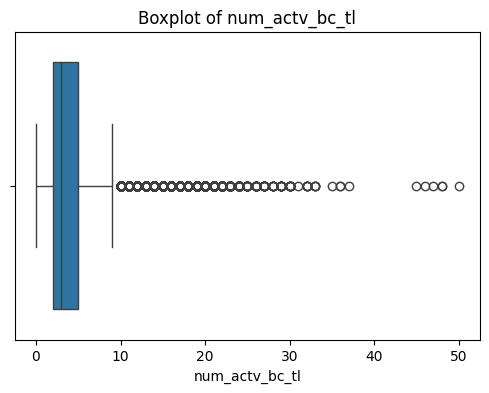

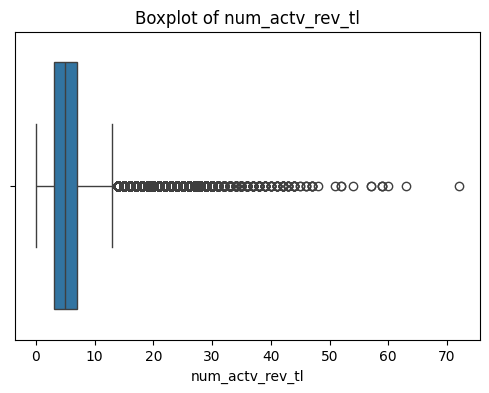

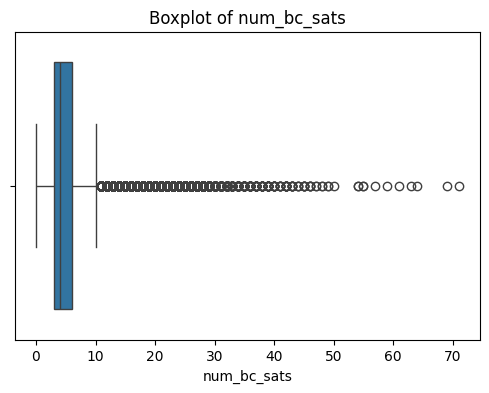

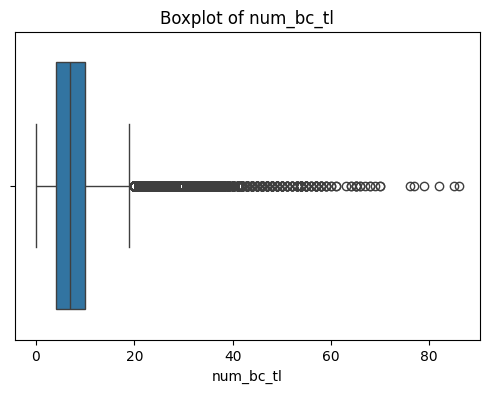

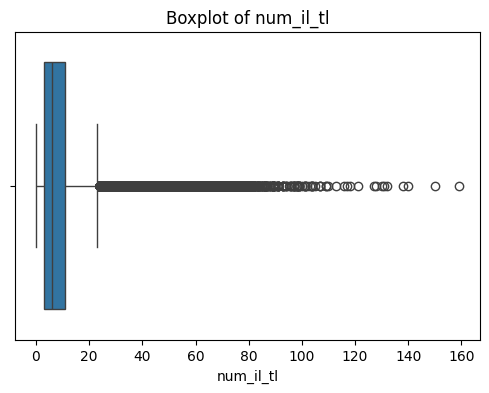

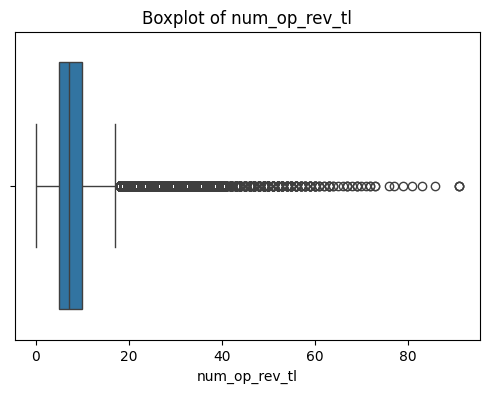

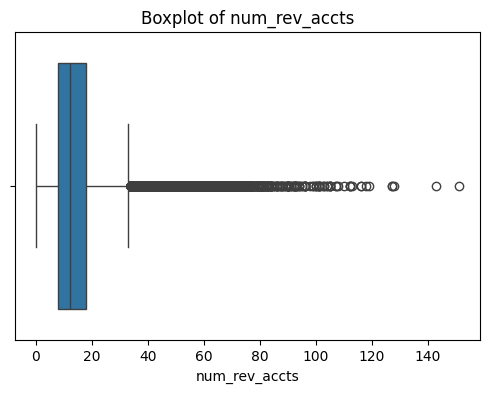

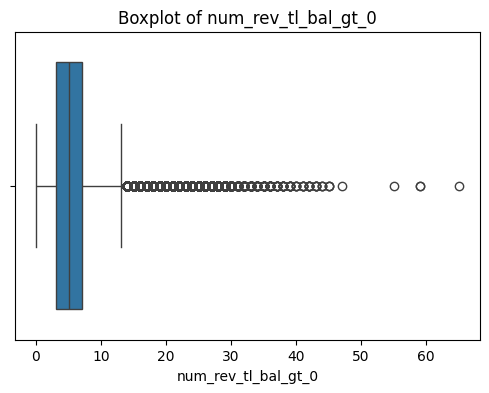

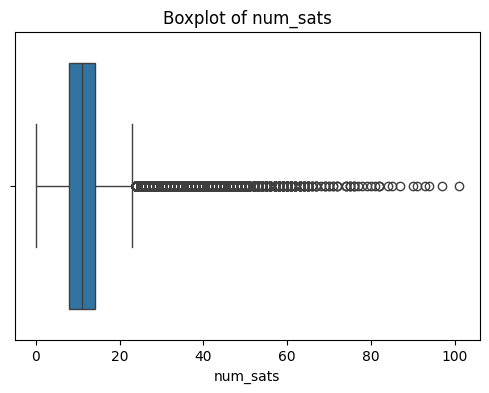

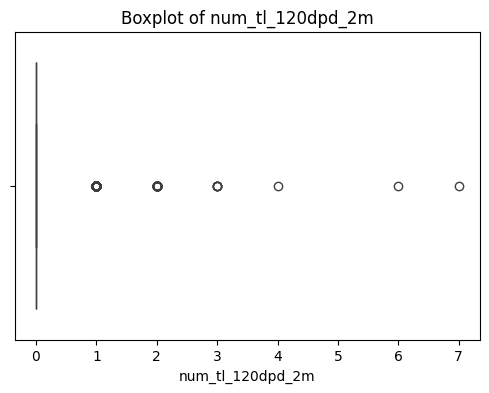

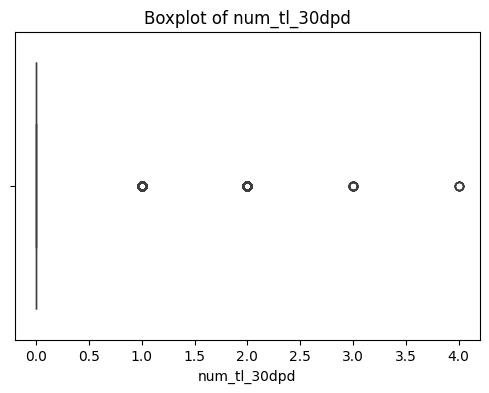

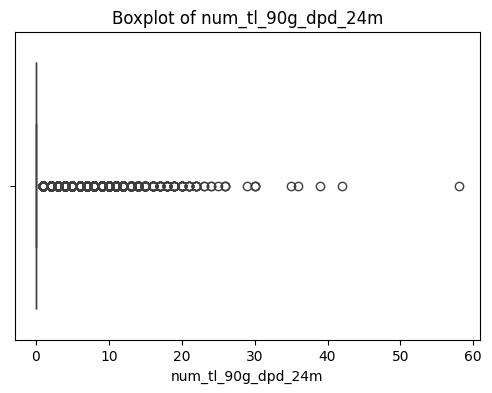

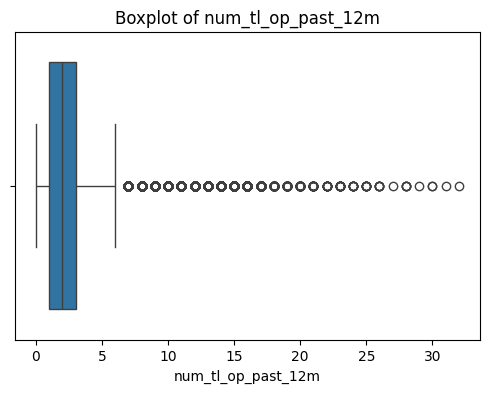

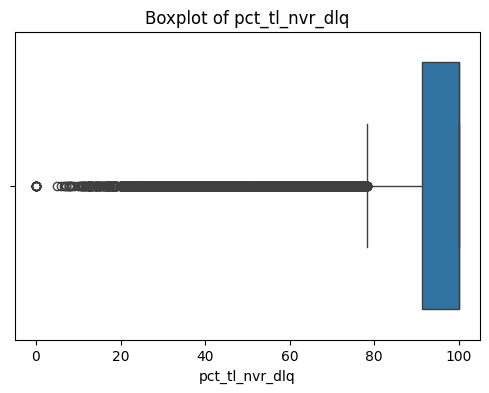

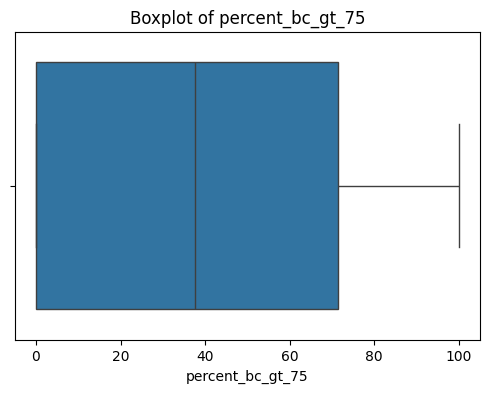

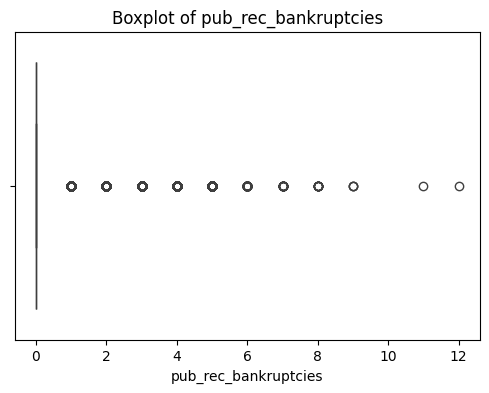

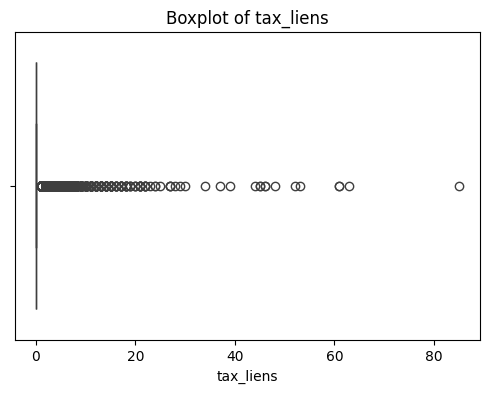

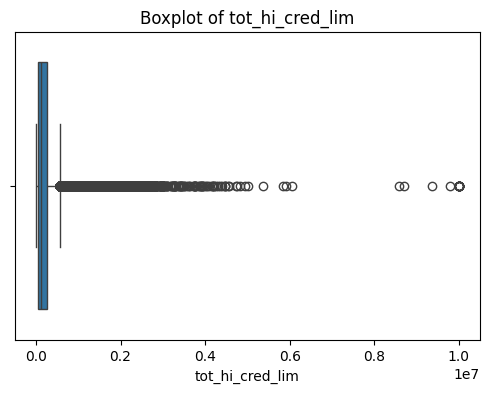

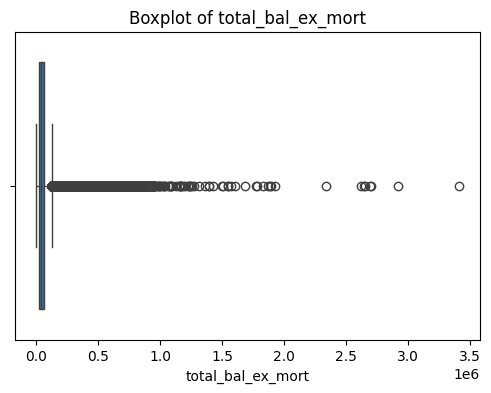

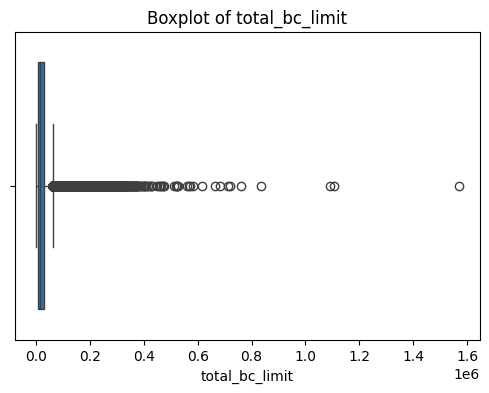

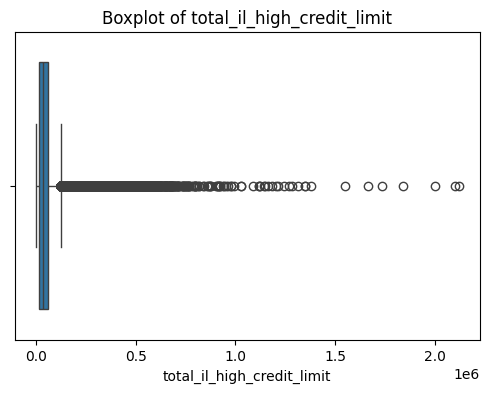

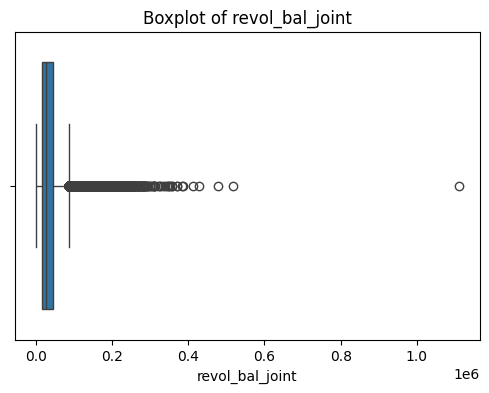

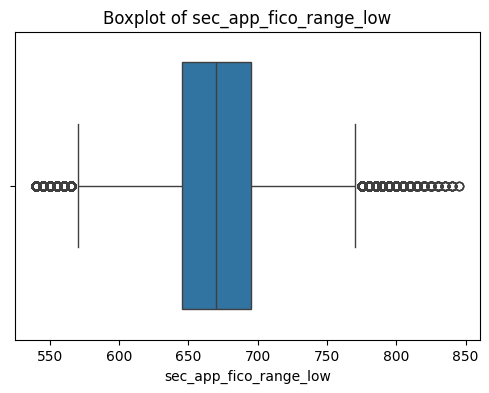

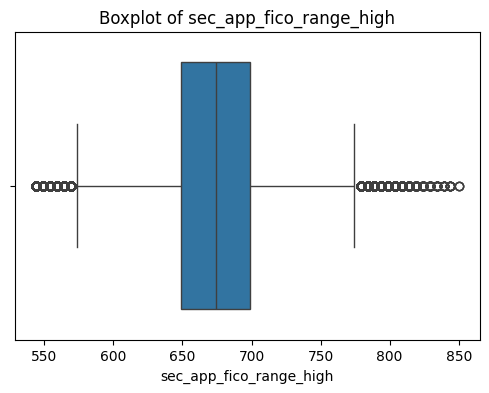

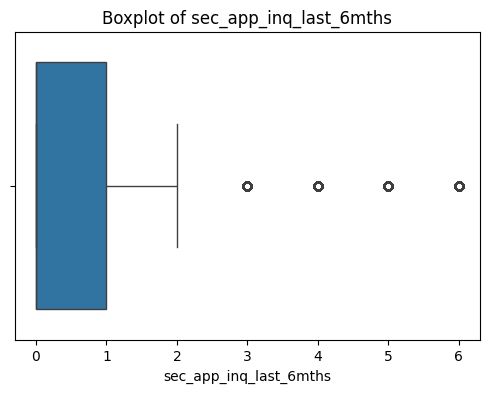

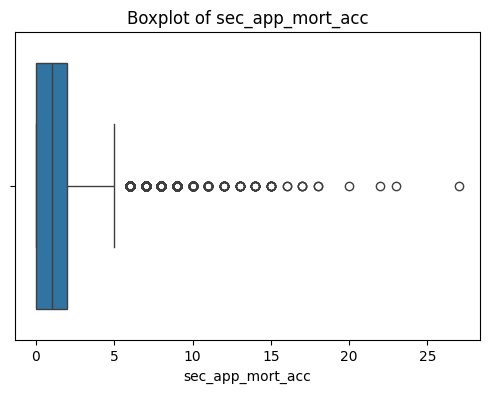

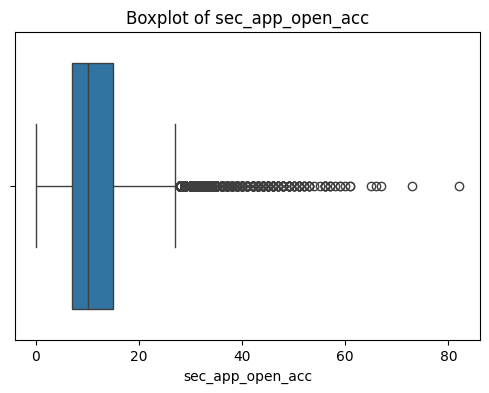

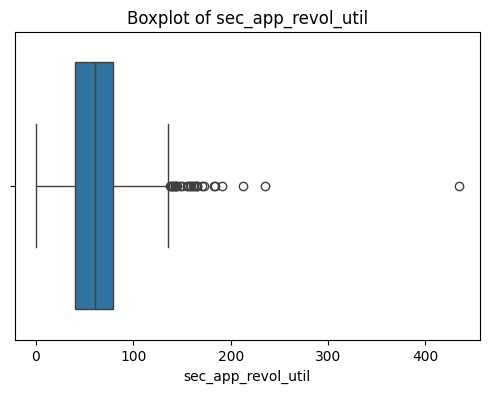

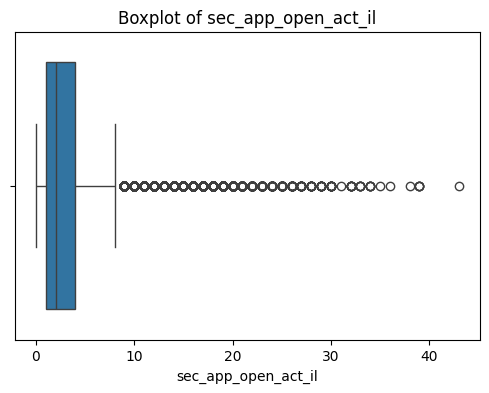

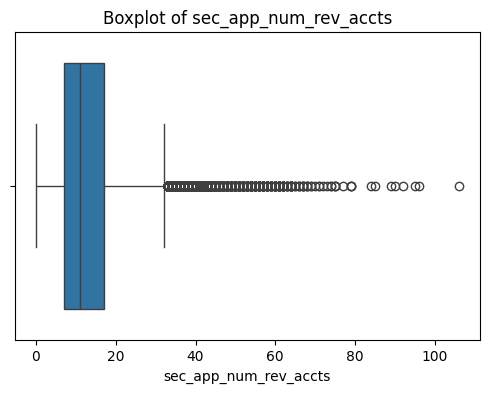

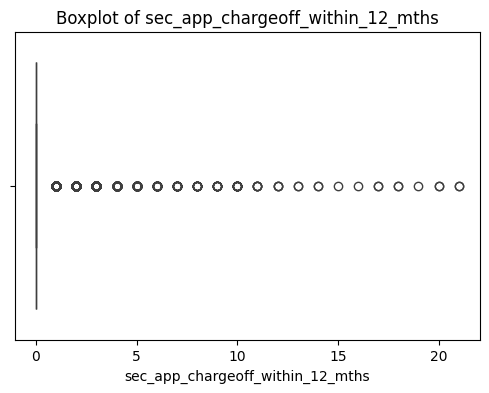

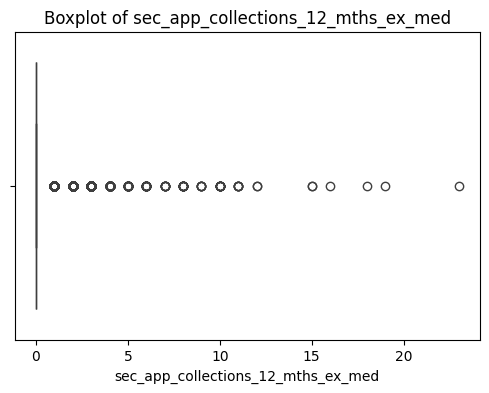

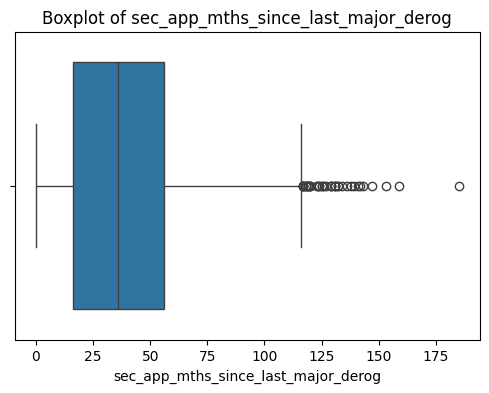

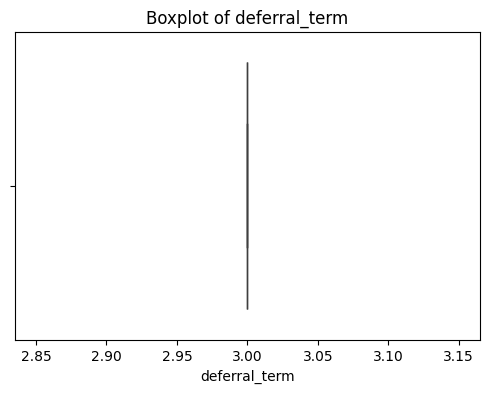

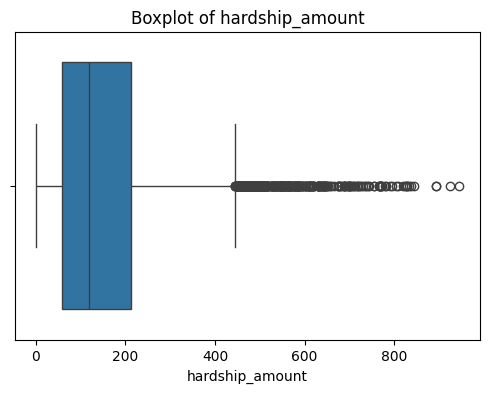

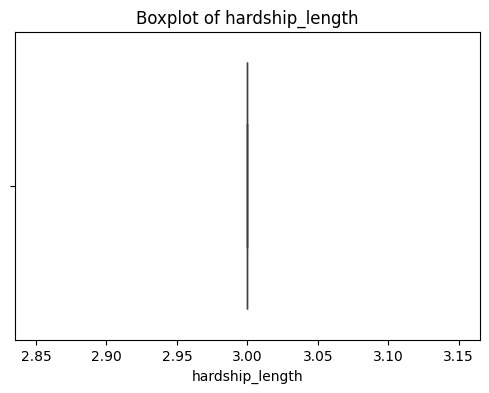

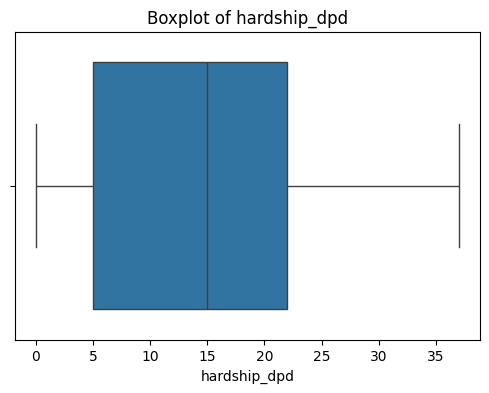

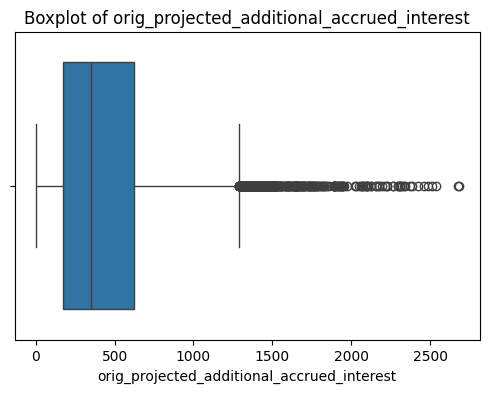

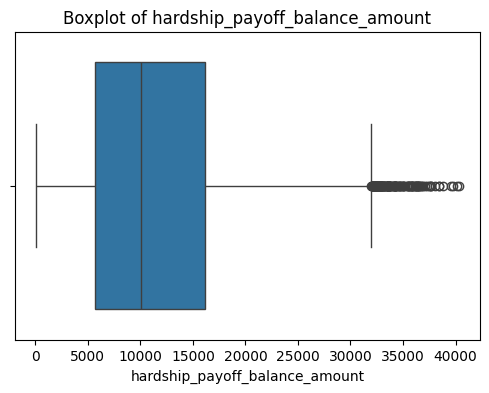

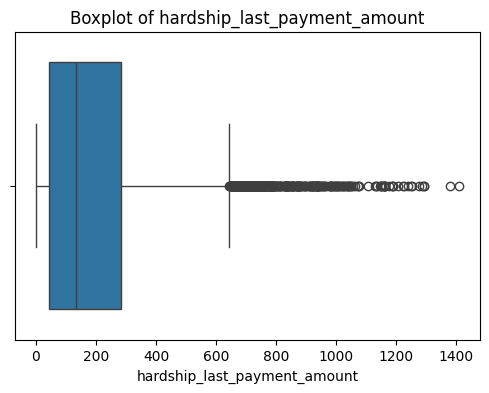

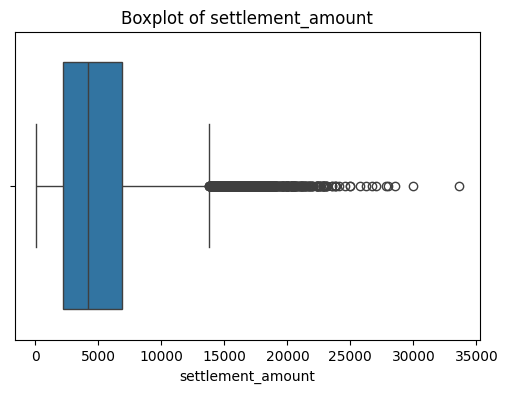

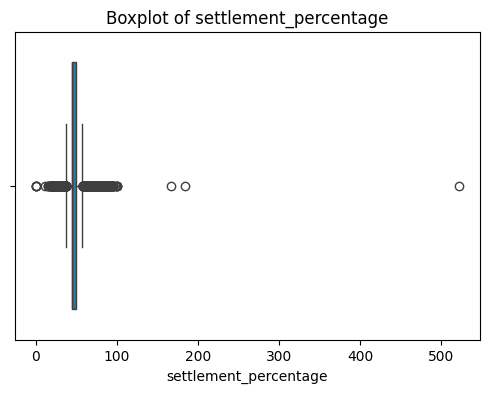

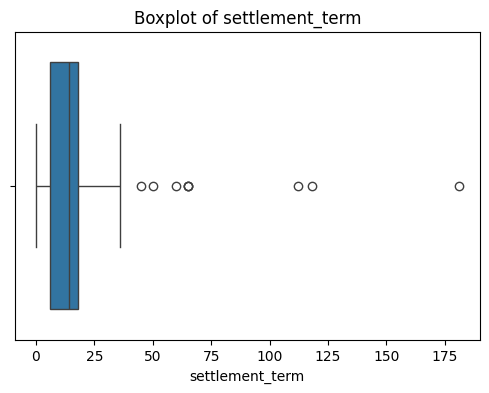

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure numerical columns are strictly numeric
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Filter valid numerical columns (no NaN or invalid values)
valid_numerical_columns = [col for col in numerical_columns if pd.api.types.is_numeric_dtype(df[col])]

# Plot distribution of numerical features
for col in valid_numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)  # Drop NaN for plotting
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Plot boxplots for numerical features
for col in valid_numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col].dropna())  # Drop NaN for plotting
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()


# 9. Visualize Categorical Features
Plot the value counts for each categorical column.


KeyboardInterrupt: 

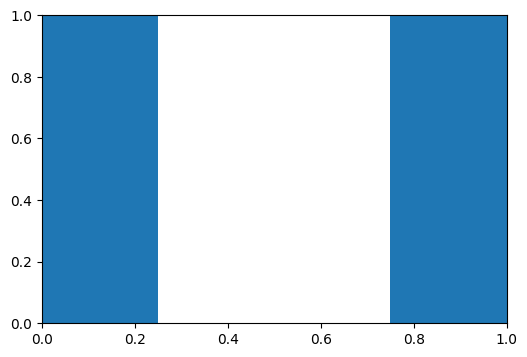

In [10]:
# Bar plots for categorical features
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Value Counts of {col}")
    plt.show()


# 10. Analyze Relationships Between Variables
Examine pairwise relationships among numerical features and the relationship between numerical and categorical features.


In [ ]:
# Pairplot for numerical data
sns.pairplot(df[numerical_columns])
plt.show()

# Boxplots between numerical and categorical variables
for col in categorical_columns:
    for num_col in numerical_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[col], y=df[num_col])
        plt.title(f"{num_col} by {col}")
        plt.show()


# EDA Completed
The exploratory data analysis is now complete. The dataset is ready for further processing or modeling.
